<a href="https://colab.research.google.com/github/bagusfadhlurrohman/Data-science/blob/main/University_rank_and_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Backgorund

The Community Partnership team at
Qarirlabs aims to conduct research on university
rankings worldwide and analyze student performance across different campuses. The
project focuses on understanding the impact of campus facilities on academic performance,
the relationship between parents' education level and student success, and the relevance
of student scores in estimating university rankings. Additionally, the project includes
exploring other analysis possibilities such as identifying top performing students and
universities, examining low ranking universities, and more.

#Objective

1. Make university rank prediction for 2023
2.
Identify which factor will affect student performance
3.
Are student performance representing their university rank or not

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

!pip install scikit-optimize
!pip install --upgrade statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


#tahun

In [ ]:
df2018 = pd.read_csv('2018-University-Rankings.csv')
df2018

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,701+,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,701+,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,701+,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,701+,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df2018.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank', 'overall_score'],
      dtype='object')

In [ ]:
import pandas as pd

# Mendapatkan daftar kolom dari dataframe
columns = df2018.columns

# Membuat dataframe dari kolom-kolom
columns_df = pd.DataFrame(columns, columns=['Columns'])

# Menampilkan dataframe kolom-kolom
display(columns_df)

,Columns
0,rank_2018
1,rank_2017
2,institution
3,country
4,classification
5,focus
6,research_intensity
7,age
8,status
9,academic_reputation_score


In [ ]:
df2018.head(10)

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
5,6,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,2,100,6,76.3,81,98.6,68,98.5,50,95.3
6,7,7,UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,XL,FC,VH,5,A,99.7,...,18,99.1,35,74.7,88,96.6,102,100,20,94.6
7,8,9,IMPERIAL COLLEGE LONDON,United Kingdom,L,FC,VH,5,A,99.4,...,8,100,18,68.7,117,100,42,100,12,93.7
8,9,10,UNIVERSITY OF CHICAGO,United States,L,FC,VH,5,B,99.9,...,55,96.5,52,85.9,48,71.9,218,79.8,149,93.5
9,10,8,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,Switzerland,L,CO,VH,5,A,99.6,...,23,68.2,178,98.7,17,100,14,98.8,47,93.3


In [ ]:
df2019 = pd.read_csv('2019-University-Rankings.csv')
df2019

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,26.4,465,-,-,-,-,7.2 - 14.2
891,801-1000,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5,A,-,...,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2
892,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2
893,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,7.2 - 14.2


In [ ]:
df2019.columns

Index(['rank_2019', 'rank_2018', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank', 'overall_score'],
      dtype='object')

In [ ]:
df2021_2022 = pd.read_csv('2021-2022-University-Rankings.csv')
df2021_2022

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,801-1000,"Vietnam National University, Hanoi",Vietnam,XL,FO,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,9 - 14.1
884,801-1000,801-1000,Voronezh State University,Russia,L,CO,HI,5,A,-,...,-,37.3,420,-,-,-,-,16.3,580,9 - 14.1
885,801-1000,801-1000,Vytautas Magnus University,Lithuania,M,FO,VH,4,A,-,...,-,-,-,-,-,17.4,583,-,-,9 - 14.1
886,801-1000,801-1000,Wroc?aw University of Science and Technology,Poland,L,FO,VH,5,A,-,...,-,26.3,564,-,-,-,-,-,-,9 - 14.1


In [ ]:
df2021_2022.columns


Index(['rank_2022', 'rank_2021', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank', 'overall_score'],
      dtype='object')

In [ ]:
df2023 = pd.read_csv('2023-University-Rankings.csv')
df2023

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501+,5.8,501+,3.6,601+,1.0,601+,1.7,601+,NaN,NaN,-
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501+,5.8,501+,2.4,601+,2.2,601+,9.3,601+,1.3,601+,-
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501+,2.6,501+,3.2,601+,3.6,601+,5.2,601+,2.8,601+,-
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501+,1.8,501+,2.7,601+,2.0,601+,NaN,NaN,NaN,NaN,-


In [ ]:
df2023.columns

Index(['institution', 'country', 'classification', 'focus',
       'research_intensity', 'age', 'status', 'academic_reputation_score',
       'academic_reputation_rank', 'employer_reputation_score',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'citations_score', 'citations_rank',
       'international_faculty_score', 'international_faculty_rank',
       'international_student_score', 'international_student_rank',
       'overall_score'],
      dtype='object')

In [ ]:
# check if all data frames have the same columns
if df2018.columns.equals(df2019.columns) and df2019.columns.equals(df2021_2022.columns):
    print('All data frames have the same columns')
else:
    print('Not all data frames have the same columns')

Not all data frames have the same columns


In [ ]:
# check if all data frames have the same columns
if df2018.columns.equals(df2019.columns) :
    print('All data frames have the same columns')
else:
    print('Not all data frames have the same columns')

Not all data frames have the same columns


In [ ]:
# check if all data frames have the same columns
if df2019.columns.equals(df2021_2022.columns):
    print('All data frames have the same columns')
else:
    print('Not all data frames have the same columns')

Not all data frames have the same columns


In [ ]:
# define columns to exclude
exclude_columns = ['rank_2022', 'rank_2021','rank_2019', 'rank_2018', 'rank_2017']

# check if all data frames have the same columns
if df2018.columns.difference(exclude_columns).equals(df2019.columns.difference(exclude_columns)) and df2018.columns.difference(exclude_columns).equals(df2021_2022.columns.difference(exclude_columns)):
    print('All data frames have the same columns')
else:
    print('Not all data frames have the same columns')


All data frames have the same columns


In [ ]:
df2018.info()
df2019.info()
df2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    object
 1   rank_2017                    895 non-null    object
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

#Check 2018

## Visualisasi

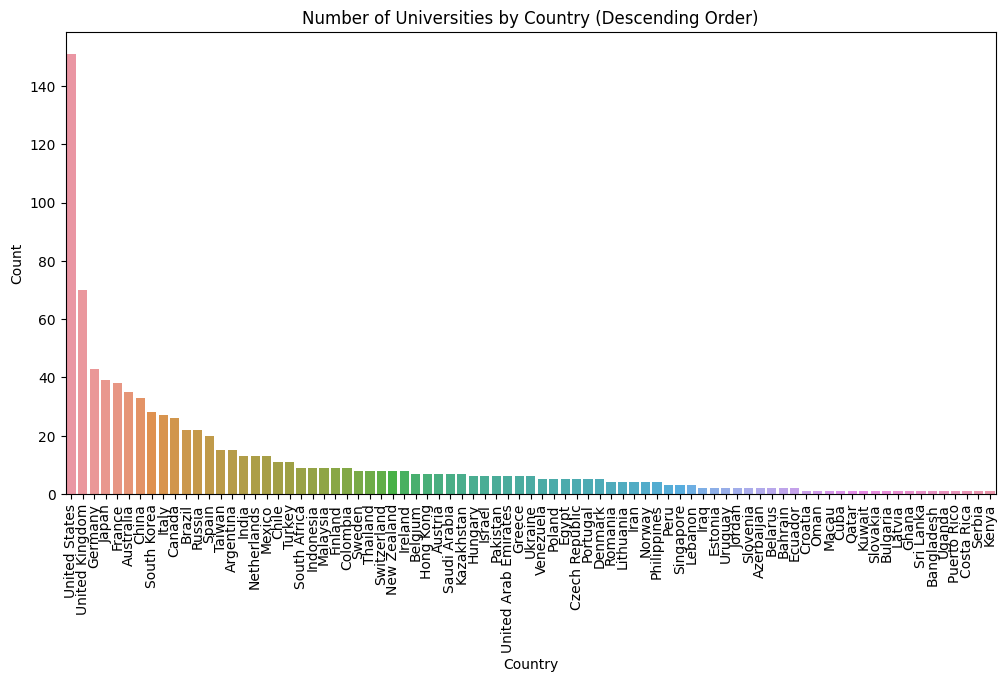

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of universities by country and sort them in descending order
country_counts = df2018['country'].value_counts().sort_values(ascending=False)

# Create a countplot of the countries
plt.figure(figsize=(12,6))
sns.countplot(data=df2018, x='country', order=country_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Universities by Country (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [ ]:
len(df2018['country'].unique())


81

In [ ]:
# Count the number of universities in each country
country_counts = df2018['country'].value_counts()

# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


           Country  Count
0    United States    151
1   United Kingdom     70
2          Germany     43
3            Japan     39
4           France     38
..             ...    ...
67          Uganda      1
66     Puerto Rico      1
65      Costa Rica      1
64          Serbia      1
80           Kenya      1

[81 rows x 2 columns]


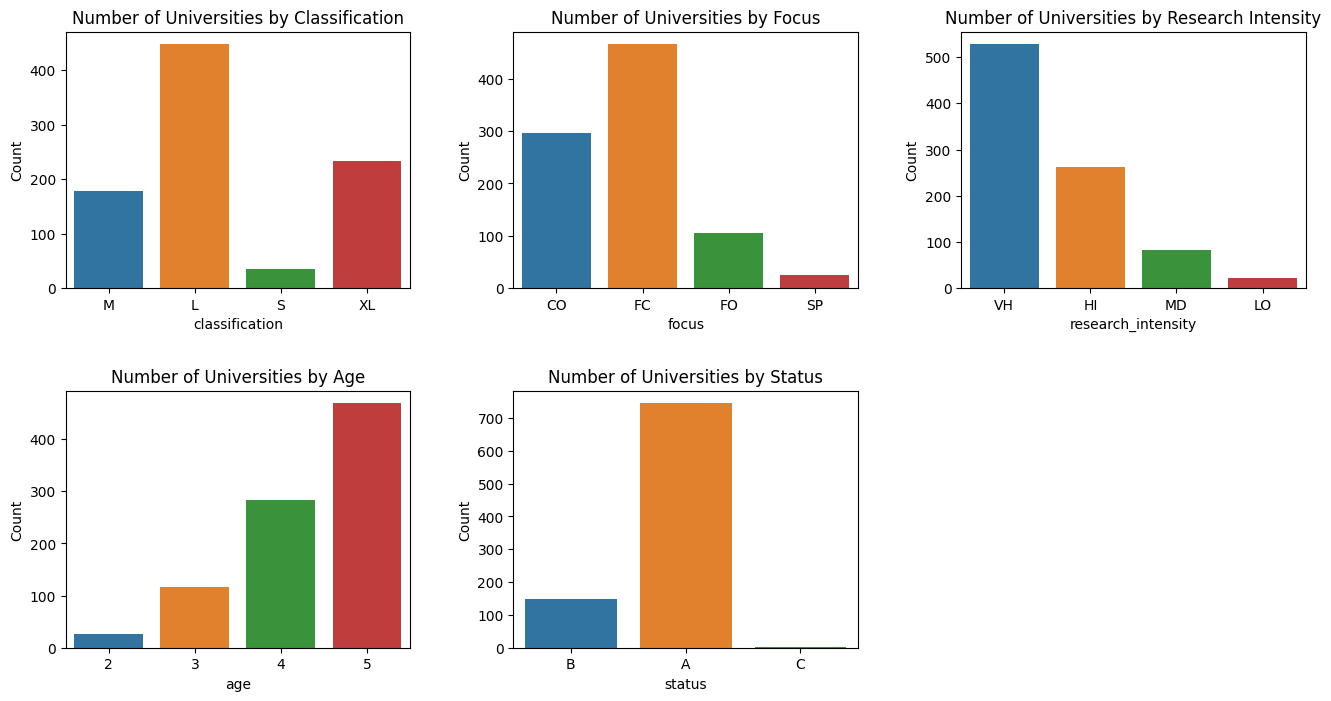

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot for Classification
sns.countplot(data=df2018, x='classification', ax=axes[0, 0])
axes[0, 0].set_title('Number of Universities by Classification')

# Plot for Focus
sns.countplot(data=df2018, x='focus', ax=axes[0, 1])
axes[0, 1].set_title('Number of Universities by Focus')

# Plot for Research Intensity
sns.countplot(data=df2018, x='research_intensity', ax=axes[0, 2])
axes[0, 2].set_title('Number of Universities by Research Intensity')

# Plot for Age
sns.countplot(data=df2018, x='age', ax=axes[1, 0])
axes[1, 0].set_title('Number of Universities by Age')

# Plot for Status
sns.countplot(data=df2018, x='status', ax=axes[1, 1])
axes[1, 1].set_title('Number of Universities by Status')

# Remove empty plot
fig.delaxes(axes[1, 2])

# Set y-axis label
for ax in axes.flatten():
    ax.set_ylabel('Count')

plt.show()


In [ ]:
classification_counts = df2018['classification'].value_counts()
focus_counts = df2018['focus'].value_counts()
research_intensity_counts = df2018['research_intensity'].value_counts()
age_counts = df2018['age'].value_counts()
status_counts = df2018['status'].value_counts()

In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'classification': classification_counts.index, 'Count': classification_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


  classification  Count
0              L    448
1             XL    233
2              M    179
3              S     35


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'focus': focus_counts.index, 'Count': focus_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('focus', ascending=False, inplace=True)
print(df_counts)


  focus  Count
3    SP     26
2    FO    106
0    FC    466
1    CO    297


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'focus': focus_counts.index, 'Count': focus_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('focus', ascending=False, inplace=True)
print(df_counts)

  focus  Count
3    SP     26
2    FO    106
0    FC    466
1    CO    297


##Preparation

In [ ]:
df2018

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,701+,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,701+,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,701+,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,701+,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    895 non-null    object
 1   rank_2017                    895 non-null    object
 2   institution                  895 non-null    object
 3   country                      895 non-null    object
 4   classification               895 non-null    object
 5   focus                        895 non-null    object
 6   research_intensity           895 non-null    object
 7   age                          895 non-null    int64 
 8   status                       895 non-null    object
 9   academic_reputation_score    895 non-null    object
 10  academic_reputation_rank     895 non-null    object
 11  employer_reputation_score    895 non-null    object
 12  employer_reputation_rank     895 non-null    object
 13  faculty_student_score        895 no

In [ ]:
df2018.columns

Index(['rank_2018', 'rank_2017', 'institution', 'country', 'classification',
       'focus', 'research_intensity', 'age', 'status',
       'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank', 'overall_score'],
      dtype='object')

In [ ]:
df2018.tail()

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
890,801-1000,701+,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,701+,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,701+,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,701+,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-
894,801-1000,701+,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-


Dilihat terdapat range rangking yang abnormal yaitu 801-1000. Oleh karena itu, akan saya telaah lagi, apa ada yang sama atau tidak

In [ ]:
df2018['rank_2018'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '  21=', '  23=',
       '25', '26', '27', '  28=', '30', '31', '32', '33', '34', '35',
       '  36=', '  38=', '40', '  41=', '43', '44', '45', '46', '  47=',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '  71=', '  73=', '75', '  76=', '  78=', '80', '81', '  82=',
       '  84=', '86', '87', '88', '89', '  90=', '92', '  93=', '  95=',
       '97', '  98=', '100', '101', '  102=', '104', '105', '106', '107',
       '108', '  109=', '112', '113', '  114=', '  116=', '118', '119',
       '120', '121', '  122=', '124', '  125=', '127', '128', '129',
       '130', '131', '132', '133', '134', '  135=', '  137=', '140',
       '141', '  142=', '144', '145', '146', '  147=', '  149=', '151',
       '152', '153', '154', '155', '156', '157', '  158=', '160',
   

Ternyta cukup banyak, dikarenakn range data menjadi tidak akurat maka akan saya buang yang mengandung range


In [ ]:
# List of values to drop
drop_values = ['401-410', '411-420', '421-430',
       '431-440', '441-450', '451-460', '461-470', '471-480', '481-490',
       '491-500', '501-550', '551-600', '601-650', '651-700', '701-750',
       '751-800', '  801-1000']

# Drop the rows that contain these values
df2018_new = df2018[~df2018['rank_2018'].isin(drop_values)]
df2018_new

,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,395=,401-410,ILLINOIS INSTITUTE OF TECHNOLOGY,United States,M,CO,VH,5,B,23.6,...,401+,19,401+,49.7,238,21.4,401+,100,14,30.7
389,397,431-440,HUFS  HANKUK (KOREA) UNIVERSITY OF FOREIGN ST...,South Korea,L,CO,MD,4,B,18.7,...,401+,78.3,127,2.1,401+,37.9,355,39,362,30.6
390,398=,421-430,"GOLDSMITHS, UNIVERSITY OF LONDON",United Kingdom,M,FO,VH,5,A,27.3,...,401+,25.5,401+,19.7,401+,85,172,97.2,60,30.5
391,398=,401-410,JOHANNES GUTENBERG UNIVERSITÄT MAINZ,Germany,XL,FC,HI,5,A,27.9,...,401+,48.7,277,20.1,401+,35.1,370,24.6,401+,30.5


Dilihat juga ada tanda '=' dan juga '+", itu juga akan saya hapus tandanya


In [ ]:
# Split the values in rank_2018 column by "=" character
split_values = df2018_new['rank_2018'].str.split('=')

# Replace the values in rank_2018 column with the first element of split_values
df2018_new['rank_2018'] = split_values.str[0]

# Convert rank_2018 column to numeric data type
df2018_new['rank_2018'] = pd.to_numeric(df2018_new['rank_2018'])

df2018_new


,rank_2018,rank_2017,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,395,401-410,ILLINOIS INSTITUTE OF TECHNOLOGY,United States,M,CO,VH,5,B,23.6,...,401+,19,401+,49.7,238,21.4,401+,100,14,30.7
389,397,431-440,HUFS  HANKUK (KOREA) UNIVERSITY OF FOREIGN ST...,South Korea,L,CO,MD,4,B,18.7,...,401+,78.3,127,2.1,401+,37.9,355,39,362,30.6
390,398,421-430,"GOLDSMITHS, UNIVERSITY OF LONDON",United Kingdom,M,FO,VH,5,A,27.3,...,401+,25.5,401+,19.7,401+,85,172,97.2,60,30.5
391,398,401-410,JOHANNES GUTENBERG UNIVERSITÄT MAINZ,Germany,XL,FC,HI,5,A,27.9,...,401+,48.7,277,20.1,401+,35.1,370,24.6,401+,30.5


In [ ]:
# Split the values in rank_2018 column by "+" character
split_values = df2018_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(lambda x: x.str.split('+', expand=True)[0])

# Replace the values in rank_2018 column with the split values
df2018_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = split_values

# Convert rank_2018 column to numeric data type
df2018_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = df2018_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(pd.to_numeric)



Karena ini untuk tahun 2018, maka kolom rangking 2017 akan saya drop

In [ ]:
# Drop the 'rank_2017' column
df2018_new = df2018_new.drop('rank_2017', axis=1)


In [ ]:
df2018_new

,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,6,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,5,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,1,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,22,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,2,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,395,ILLINOIS INSTITUTE OF TECHNOLOGY,United States,M,CO,VH,5,B,23.6,401,...,401,19,401,49.7,238,21.4,401,100,14,30.7
389,397,HUFS  HANKUK (KOREA) UNIVERSITY OF FOREIGN ST...,South Korea,L,CO,MD,4,B,18.7,401,...,401,78.3,127,2.1,401,37.9,355,39,362,30.6
390,398,"GOLDSMITHS, UNIVERSITY OF LONDON",United Kingdom,M,FO,VH,5,A,27.3,401,...,401,25.5,401,19.7,401,85,172,97.2,60,30.5
391,398,JOHANNES GUTENBERG UNIVERSITÄT MAINZ,Germany,XL,FC,HI,5,A,27.9,396,...,401,48.7,277,20.1,401,35.1,370,24.6,401,30.5


In [ ]:
df2018_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    393 non-null    int64 
 1   institution                  393 non-null    object
 2   country                      393 non-null    object
 3   classification               393 non-null    object
 4   focus                        393 non-null    object
 5   research_intensity           393 non-null    object
 6   age                          393 non-null    int64 
 7   status                       393 non-null    object
 8   academic_reputation_score    393 non-null    object
 9   academic_reputation_rank     393 non-null    int64 
 10  employer_reputation_score    393 non-null    object
 11  employer_reputation_rank     393 non-null    int64 
 12  faculty_student_score        393 non-null    object
 13  faculty_student_rank         393 no

In [ ]:
df2018_new = df2018_new.replace('-', 0)

In [ ]:
# Find rows containing '-'
df_contain_dash = df2018_new.loc[df2018_new.eq('-').any(axis=1)]

# Print the rows
print(df_contain_dash)


Empty DataFrame
Columns: [rank_2018, institution, country, classification, focus, research_intensity, age, status, academic_reputation_score, academic_reputation_rank, employer_reputation_score, employer_reputation_rank, faculty_student_score, faculty_student_rank, citations_score, citations_rank, international_faculty_score, international_faculty_rank, international_student_score, international_student_rank, overall_score]
Index: []

[0 rows x 21 columns]


In [ ]:
df2018_new.isna().sum()

rank_2018                      0
institution                    0
country                        0
classification                 0
focus                          0
research_intensity             0
age                            0
status                         0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

In [ ]:
df2018_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2018                    393 non-null    int64 
 1   institution                  393 non-null    object
 2   country                      393 non-null    object
 3   classification               393 non-null    object
 4   focus                        393 non-null    object
 5   research_intensity           393 non-null    object
 6   age                          393 non-null    int64 
 7   status                       393 non-null    object
 8   academic_reputation_score    393 non-null    object
 9   academic_reputation_rank     393 non-null    int64 
 10  employer_reputation_score    393 non-null    object
 11  employer_reputation_rank     393 non-null    int64 
 12  faculty_student_score        393 non-null    object
 13  faculty_student_rank         393 no

In [ ]:
# Replace missing values with 0
df2018_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2018_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']].fillna(0)

# Convert column to integer type
df2018_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']]= df2018_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']].astype(float)
df2018_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    393 non-null    int64  
 1   institution                  393 non-null    object 
 2   country                      393 non-null    object 
 3   classification               393 non-null    object 
 4   focus                        393 non-null    object 
 5   research_intensity           393 non-null    object 
 6   age                          393 non-null    int64  
 7   status                       393 non-null    object 
 8   academic_reputation_score    393 non-null    float64
 9   academic_reputation_rank     393 non-null    int64  
 10  employer_reputation_score    393 non-null    float64
 11  employer_reputation_rank     393 non-null    int64  
 12  faculty_student_score        393 non-null    float64
 13  faculty_student_rank

Data menurut saya sudah rapih dan cukup untuk dilanjutkan menganalisa

## machine learning

Sya ingin mencari tau apa yang membuat peringkat univ nomor 1

In [ ]:
df2018_new = df2018_new.drop('institution', axis=1)
df2018_new = df2018_new.drop('country', axis=1)
df2018_new

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,M,CO,VH,5,B,100.0,6,100.0,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0
1,2,L,FC,VH,5,B,100.0,5,100.0,5,100.0,12,99.4,12,99.6,54,72.7,177,98.7
2,3,L,FC,VH,5,B,100.0,1,100.0,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,S,CO,VH,5,B,99.5,22,85.4,77,100.0,3,100.0,4,93.4,126,89.2,106,97.7
4,5,L,FC,VH,5,A,100.0,2,100.0,1,100.0,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,395,M,CO,VH,5,B,23.6,401,13.9,401,19.0,401,49.7,238,21.4,401,100.0,14,30.7
389,397,L,CO,MD,4,B,18.7,401,31.5,401,78.3,127,2.1,401,37.9,355,39.0,362,30.6
390,398,M,FO,VH,5,A,27.3,401,13.2,401,25.5,401,19.7,401,85.0,172,97.2,60,30.5
391,398,XL,FC,HI,5,A,27.9,396,25.2,401,48.7,277,20.1,401,35.1,370,24.6,401,30.5


In [ ]:
df2018_new.columns

Index(['rank_2018', 'classification', 'focus', 'research_intensity', 'age',
       'status', 'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank', 'overall_score'],
      dtype='object')

encode data

In [ ]:
# membuat dictionary untuk mapping
encode_dict_classification = {'XL': 3, 'L': 2, 'M': 1, 'S': 0}
# melakukan mapping dengan method 'map'
df2018_new['classification'] = df2018_new['classification'].map(encode_dict_classification)

# membuat dictionary untuk mapping
encode_dict_focus = {'FC': 3, 'CO': 2, 'FO': 1, 'SP': 0}
# melakukan mapping dengan method 'map'
df2018_new['focus'] = df2018_new['focus'].map(encode_dict_focus)

# membuat dictionary untuk mapping
encode_dict_research_intensity = {'VH': 3, 'HI': 2, 'MD': 1, 'LO': 0}
# melakukan mapping dengan method 'map'
df2018_new['research_intensity'] = df2018_new['research_intensity'].map(encode_dict_research_intensity)

# membuat dictionary untuk mapping
encode_dict_status = {'A': 0, 'B': 1}
# melakukan mapping dengan method 'map'
df2018_new['status'] = df2018_new['status'].map(encode_dict_status)


In [ ]:
df2018_new

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,2,3,5,1,100.0,6,100.0,4,100.0,14,99.9,8,100.0,36,96.1,70,100.0
1,2,2,3,3,5,1,100.0,5,100.0,5,100.0,12,99.4,12,99.6,54,72.7,177,98.7
2,3,2,3,3,5,1,100.0,1,100.0,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,0,2,3,5,1,99.5,22,85.4,77,100.0,3,100.0,4,93.4,126,89.2,106,97.7
4,5,2,3,3,5,0,100.0,2,100.0,1,100.0,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,395,1,2,3,5,1,23.6,401,13.9,401,19.0,401,49.7,238,21.4,401,100.0,14,30.7
389,397,2,2,1,4,1,18.7,401,31.5,401,78.3,127,2.1,401,37.9,355,39.0,362,30.6
390,398,1,1,3,5,0,27.3,401,13.2,401,25.5,401,19.7,401,85.0,172,97.2,60,30.5
391,398,3,3,2,5,0,27.9,396,25.2,401,48.7,277,20.1,401,35.1,370,24.6,401,30.5


In [ ]:
df2018_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2018                    393 non-null    int64  
 1   classification               393 non-null    int64  
 2   focus                        393 non-null    int64  
 3   research_intensity           393 non-null    int64  
 4   age                          393 non-null    int64  
 5   status                       393 non-null    int64  
 6   academic_reputation_score    393 non-null    float64
 7   academic_reputation_rank     393 non-null    int64  
 8   employer_reputation_score    393 non-null    float64
 9   employer_reputation_rank     393 non-null    int64  
 10  faculty_student_score        393 non-null    float64
 11  faculty_student_rank         393 non-null    int64  
 12  citations_score              393 non-null    float64
 13  citations_rank      

Saya ingin tahu apakah rangking dan nilai overall score berkorelasi kuat atau tidak

In [ ]:
df2018_new.corr()

,rank_2018,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
rank_2018,1.000000,-0.206032,-0.279161,-0.310090,-0.324658,-0.117066,-0.874113,0.867749,-0.712758,0.700372,-0.317348,0.308875,-0.569035,0.565112,-0.292591,0.288289,-0.292456,0.280394,-0.957707
classification,-0.206032,1.000000,0.478518,0.025897,0.223097,-0.173336,0.423784,-0.440467,0.240734,-0.218586,-0.322148,0.309729,-0.005501,0.002846,-0.078403,0.098230,-0.146890,0.173905,0.152609
focus,-0.279161,0.478518,1.000000,0.031092,0.188134,0.072380,0.353387,-0.359517,0.086060,-0.097606,-0.001808,0.016247,0.081089,-0.048121,0.029896,-0.017976,-0.075167,0.092640,0.241051
research_intensity,-0.310090,0.025897,0.031092,1.000000,0.187366,-0.123322,0.223972,-0.239507,0.088866,-0.083359,0.011889,-0.005937,0.388102,-0.298374,0.050739,-0.039723,0.086614,-0.050963,0.279777
age,-0.324658,0.223097,0.188134,0.187366,1.000000,0.144896,0.328722,-0.337999,0.252877,-0.251080,0.018833,-0.030960,0.161245,-0.153041,0.030665,-0.001246,0.096186,-0.069904,0.298185
status,-0.117066,-0.173336,0.072380,-0.123322,0.144896,1.000000,0.062409,-0.043408,0.115565,-0.117144,0.274986,-0.275671,0.058578,-0.063542,-0.094872,0.113873,0.015387,0.002416,0.158198
academic_reputation_score,-0.874113,0.423784,0.353387,0.223972,0.328722,0.062409,1.000000,-0.975462,0.741867,-0.724953,0.123453,-0.120154,0.407950,-0.408256,0.107108,-0.115353,0.115993,-0.119468,0.886779
academic_reputation_rank,0.867749,-0.440467,-0.359517,-0.239507,-0.337999,-0.043408,-0.975462,1.000000,-0.715395,0.703261,-0.092711,0.089029,-0.387927,0.385705,-0.083086,0.086549,-0.074737,0.075761,-0.845693
employer_reputation_score,-0.712758,0.240734,0.086060,0.088866,0.252877,0.115565,0.741867,-0.715395,1.000000,-0.980135,0.087730,-0.095812,0.257639,-0.272907,0.191406,-0.207890,0.227509,-0.236260,0.734094
employer_reputation_rank,0.700372,-0.218586,-0.097606,-0.083359,-0.251080,-0.117144,-0.724953,0.703261,-0.980135,1.000000,-0.082050,0.088506,-0.255773,0.265613,-0.179820,0.196704,-0.216604,0.227984,-0.716559


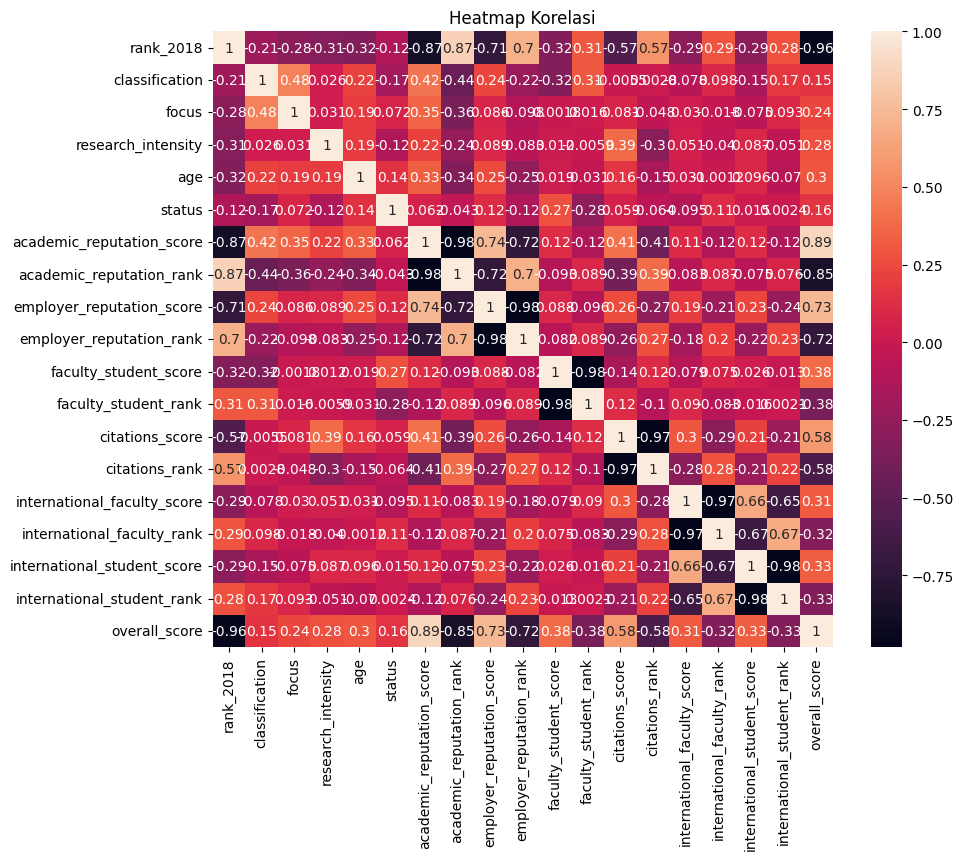

In [ ]:
import seaborn as sns
import pandas as pd

corr = df2018_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
import matplotlib.pyplot as plt

plt.title('Heatmap Korelasi')
plt.savefig('heatmap.png')
plt.show()


Dapat dilihat bahwa hubugnanya antara ranking dan overall score sangat kuat, korelasi negatif menunjukkan semakin tinggi nilai overall score maka, semakin tinggi juga peringkatnya

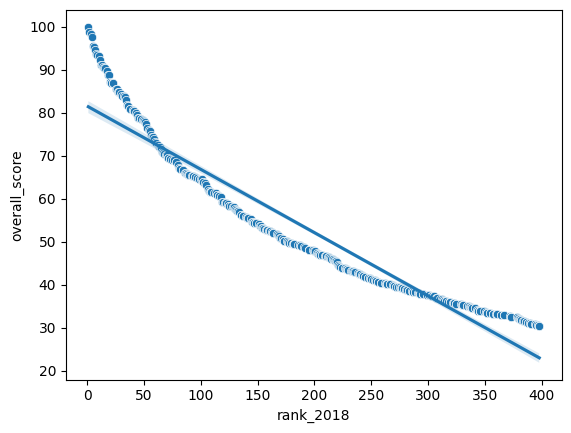

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="rank_2018", y="overall_score", data=df2018_new)

# Add a line of best fit to the scatter plot
sns.regplot(x="rank_2018", y="overall_score", data=df2018_new, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("rank_2018")
plt.ylabel("overall_score")

# Show the plot
plt.show()


Saya coba uji dengan korelasi spearman

In [ ]:
from scipy.stats import spearmanr 
rho,p = spearmanr(df2018_new['rank_2018'],df2018_new['overall_score'])
print('rho',rho)
print('p',p)

rho -1.0
p 0.0


Hasilnya juga bagus, dimana rho nya -1 menunjukkan hubugnan kuat dan p < 0.05 yanf mennunjukkan ada hubungan

Oleh karena itu, dapat disimpulkan bahwa penentuan ranking universitas dunia berdsarkan overall score


Lalu saya akan melaknjutkan analisa, faktor-faktor apa saja yang memengaruhi Overall score



In [ ]:
# Define X and y
X = df2018_new[['classification', 'focus', 'research_intensity', 'age',
       'status', 'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank',]]
y = df2018_new['overall_score']


In [ ]:
from scipy.stats import spearmanr

for col in X.columns:
    corr, pval = spearmanr(X[col], y)
    print(f"Correlation between {col} and overall_score: {corr:.3f}, p-value: {pval:.3f}")

Correlation between classification and overall_score: 0.213, p-value: 0.000
Correlation between focus and overall_score: 0.298, p-value: 0.000
Correlation between research_intensity and overall_score: 0.326, p-value: 0.000
Correlation between age and overall_score: 0.339, p-value: 0.000
Correlation between status and overall_score: 0.118, p-value: 0.019
Correlation between academic_reputation_score and overall_score: 0.875, p-value: 0.000
Correlation between academic_reputation_rank and overall_score: -0.873, p-value: 0.000
Correlation between employer_reputation_score and overall_score: 0.712, p-value: 0.000
Correlation between employer_reputation_rank and overall_score: -0.708, p-value: 0.000
Correlation between faculty_student_score and overall_score: 0.324, p-value: 0.000
Correlation between faculty_student_rank and overall_score: -0.318, p-value: 0.000
Correlation between citations_score and overall_score: 0.572, p-value: 0.000
Correlation between citations_rank and overall_score:

Berdasarkan nilai korelasi antara variabel dengan overall_score yang diberikan, dapat dilihat bahwa variabel yang paling berpengaruh adalah academic_reputation_score dan employer_reputation_score, dengan korelasi masing-masing sebesar 0.875 dan 0.712. Variabel yang memiliki pengaruh sedang adalah citations_score dengan korelasi sebesar 0.572, dan variabel yang memiliki pengaruh lebih rendah adalah age dan status dengan korelasi masing-masing sebesar 0.339 dan 0.118. Sedangkan untuk variabel lainnya seperti classification, focus, research_intensity, faculty_student_score, international_faculty_score, dan international_student_score memiliki korelasi yang lebih rendah dibandingkan variabel yang telah disebutkan sebelumnya.

In [ ]:
# Backward selection
features = X.columns.tolist()
p_value_threshold = 0.05

while len(features) > 1:
    model = sm.OLS(y, sm.add_constant(X[features])).fit()
    max_p_value = model.pvalues.drop('const').max()
    if max_p_value >= p_value_threshold:
        features.remove(model.pvalues.idxmax())
    else:
        break

# Print results
print("Backward selection result:")
print("Selected features:", features)

Backward selection result:
Selected features: ['age', 'academic_reputation_score', 'employer_reputation_score', 'faculty_student_score', 'citations_score', 'international_faculty_score', 'international_student_score']


In [ ]:
# Menambahkan variabel 'const' ke dalam dataframe X
X = sm.add_constant(X)

# Forward selection
features = ['const']
p_value_threshold = 0.05

while len(features) < len(X.columns):
    remaining_features = list(set(X.columns) - set(features))
    p_values = []
    for feature in remaining_features:
        model = sm.OLS(y, X[features+[feature]]).fit()
        p_value = model.pvalues[feature]
        p_values.append(p_value)
    min_p_value = min(p_values)
    if min_p_value < p_value_threshold:
        features.append(remaining_features[p_values.index(min_p_value)])
    else:
        break
# Print results
print("Forward selection result:")
print("Selected features:", features)

Forward selection result:
Selected features: ['const', 'academic_reputation_score', 'faculty_student_score', 'citations_score', 'international_student_score', 'employer_reputation_score', 'international_faculty_score', 'age']


Dari hasil forward selection, feature selection, dan korelasi spearman. Maka saya akan menset up variable nya X nya ialah 'academic_reputation_score', 'faculty_student_score', 'citations_score', 'international_student_score', 'employer_reputation_score', 'international_faculty_score',dan 'age'

Pertama saya cek multikolerasi dulu,saya akan mengeset semua kolom menjadi X kecuali kolom Y

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define X and y
X = df2018_new[[ 'age',
       'academic_reputation_score',
       'employer_reputation_score',
       'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score']]
y = df2018_new['overall_score']


# Add constant to X
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for each feature
print(vif)


                       feature        VIF
0                        const  45.650119
1                          age   1.131862
2    academic_reputation_score   2.746136
3    employer_reputation_score   2.373677
4        faculty_student_score   1.075186
5              citations_score   1.378459
6  international_faculty_score   1.912449
7  international_student_score   1.859833


In [ ]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid


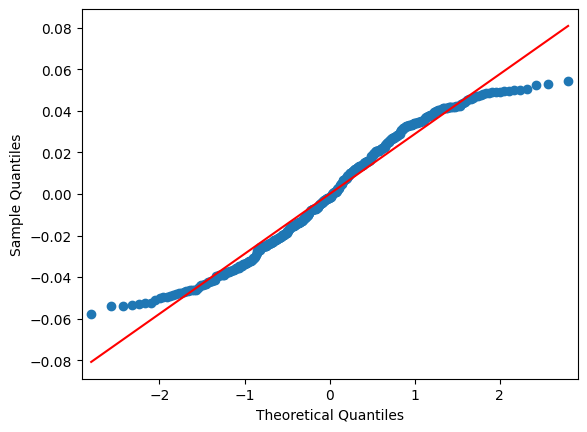


Shapiro-Wilk Test:
Statistic = 0.968, p-value = 0.000
Residual tidak terdistribusi normal (menolak H0)


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

# Shapiro-Wilk test
stat_sw, p_sw = stats.shapiro(residuals)
print('\nShapiro-Wilk Test:')
print(f'Statistic = {stat_sw:.3f}, p-value = {p_sw:.3f}')
if p_sw > 0.05:
    print('Residual terdistribusi normal (tidak dapat menolak H0)')
else:
    print('Residual tidak terdistribusi normal (menolak H0)')

Karena tidak terdistribusi normal maka model OLS kurang dapat dipercaya. Maka saya menggunakna regresi logistik ordinal

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Membuat model regresi logistik ordinal
model = sm.OLS(y, X)

# Menyesuaikan model dengan data
result = model.fit()

# Melihat hasil regresi
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          overall_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.084e+07
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        12:23:26   Log-Likelihood:                 836.09
No. Observations:                 393   AIC:                            -1656.
Df Residuals:                     385   BIC:                            -1624.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Dari nilai R-sqiared dan Adj. R-squared yang bernilai 1 menunjukkan bahwa model cocok. Nilai Prob (F-statistic) bernilai 0.00, yang berarti model secara signifikan cocok dengan data.Lalu semya variable independen memiliki koefisien yang positif dan signifikan secara statistik dengan P>|t| bernilai 0.000 untuk setiap variabel. Artinya, setiap variabel independen memberikan kontribusi positif yang signifikan terhadap variabel dependen overall_score. 

Bahwa dapat disimpulkan variable yang telah dicantumkan pada X ialah variabel yang menentukkan overall_score yang nantinya akan memengaruhi rangking universitas 


# Check 2019

## Visualisasi

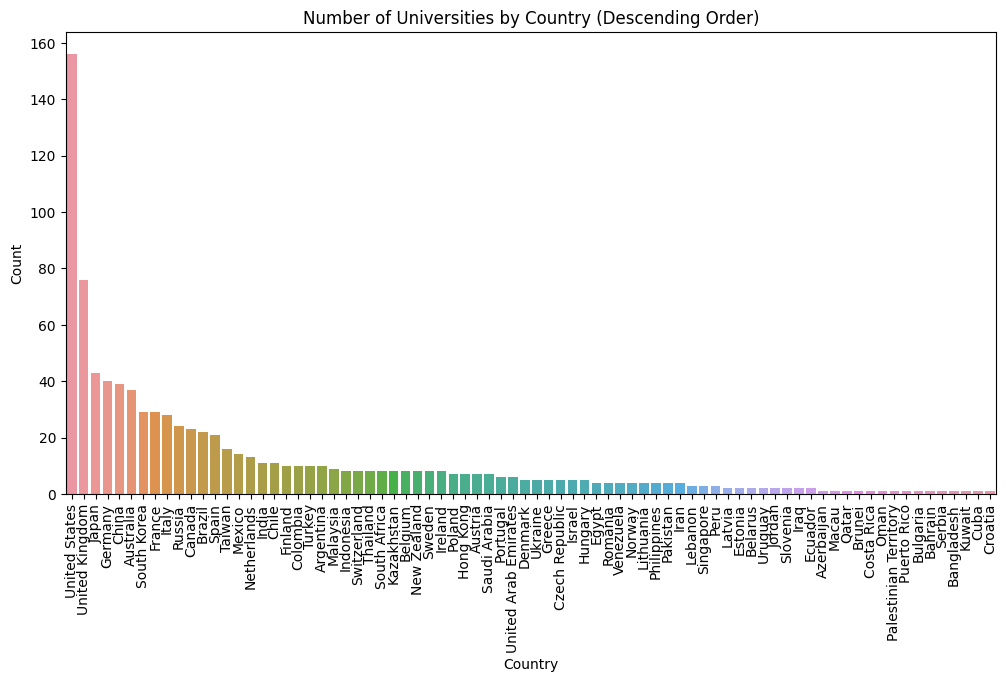

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of universities by country and sort them in descending order
country_counts = df2019['country'].value_counts().sort_values(ascending=False)

# Create a countplot of the countries
plt.figure(figsize=(12,6))
sns.countplot(data=df2019, x='country', order=country_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Universities by Country (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [ ]:
len(df2019['country'].unique())

78

In [ ]:
# Count the number of universities in each country
country_counts = df2019['country'].value_counts()

# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


           Country  Count
0    United States    156
1   United Kingdom     76
2            Japan     43
3          Germany     40
4            China     39
..             ...    ...
66          Serbia      1
65      Bangladesh      1
64          Kuwait      1
63            Cuba      1
77         Croatia      1

[78 rows x 2 columns]


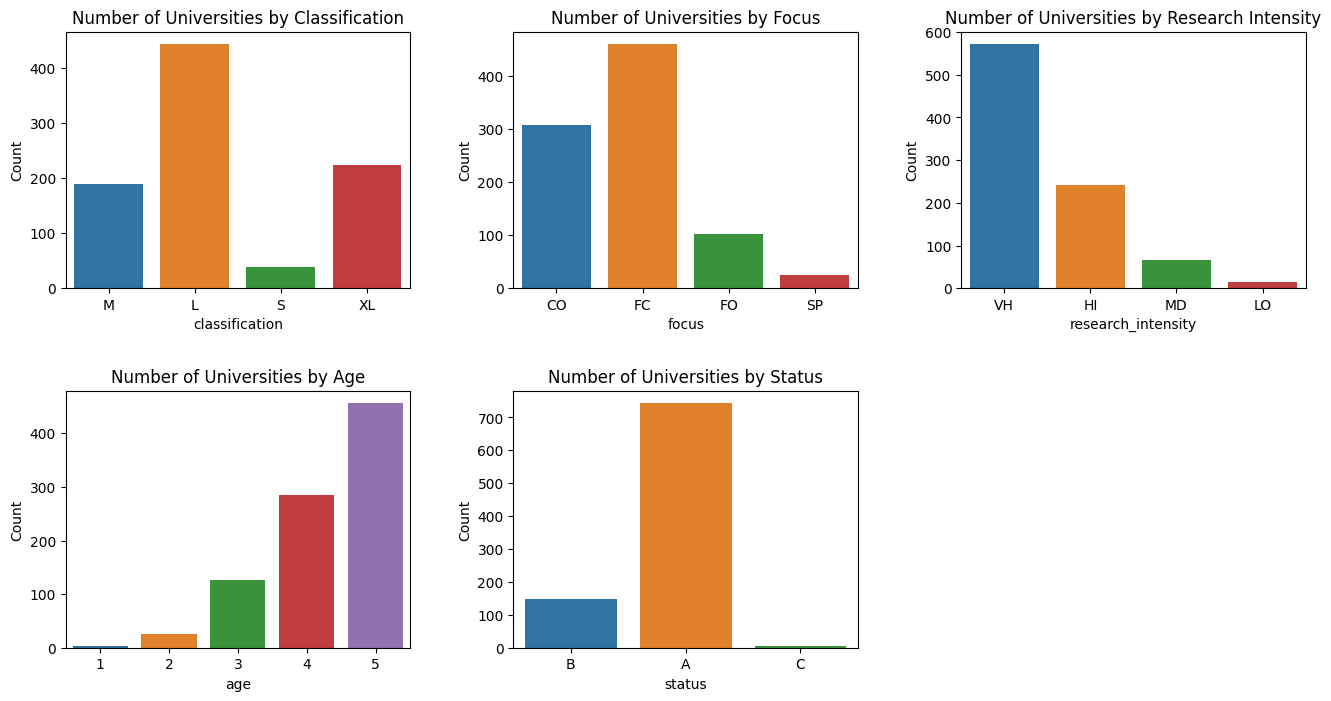

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot for Classification
sns.countplot(data=df2019, x='classification', ax=axes[0, 0])
axes[0, 0].set_title('Number of Universities by Classification')

# Plot for Focus
sns.countplot(data=df2019, x='focus', ax=axes[0, 1])
axes[0, 1].set_title('Number of Universities by Focus')

# Plot for Research Intensity
sns.countplot(data=df2019, x='research_intensity', ax=axes[0, 2])
axes[0, 2].set_title('Number of Universities by Research Intensity')

# Plot for Age
sns.countplot(data=df2019, x='age', ax=axes[1, 0])
axes[1, 0].set_title('Number of Universities by Age')

# Plot for Status
sns.countplot(data=df2019, x='status', ax=axes[1, 1])
axes[1, 1].set_title('Number of Universities by Status')

# Remove empty plot
fig.delaxes(axes[1, 2])

# Set y-axis label
for ax in axes.flatten():
    ax.set_ylabel('Count')

plt.show()


In [ ]:
classification_counts = df2019['classification'].value_counts()
focus_counts = df2019['focus'].value_counts()
research_intensity_counts = df2019['research_intensity'].value_counts()
age_counts = df2019['age'].value_counts()
status_counts = df2019['status'].value_counts()

In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'classification': classification_counts.index, 'Count': classification_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


  classification  Count
0              L    443
1             XL    224
2              M    190
3              S     38


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'research_intensity': research_intensity_counts.index, 'Count': research_intensity_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('research_intensity', ascending=False, inplace=True)
print(df_counts)

  research_intensity  Count
0                 VH    572
2                 MD     66
3                 LO     15
1                 HI    242


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'focus': focus_counts.index, 'Count': focus_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('focus', ascending=False, inplace=True)
print(df_counts)


  focus  Count
3    SP     26
2    FO    102
0    FC    460
1    CO    307


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'status': status_counts.index, 'Count': status_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('status', ascending=False, inplace=True)
print(df_counts)


  status  Count
2      C      4
1      B    148
0      A    743


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'age': age_counts.index, 'Count': age_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('age', ascending=False, inplace=True)
print(df_counts)


   age  Count
0    5    456
1    4    285
2    3    126
3    2     25
4    1      3


## preparation

In [ ]:
df2019

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,26.4,465,-,-,-,-,7.2 - 14.2
891,801-1000,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5,A,-,...,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2
892,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2
893,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,7.2 - 14.2


In [ ]:
df2019['rank_2019'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '51', '52', '53', '54', '55', '56', '57',
       '58', '  59=', '61', '62', '63', '64', '65', '66', '67', '68',
       '  69=', '71', '72', '73', '74', '  75=', '77', '78', '  79=',
       '81', '82', '  83=', '85', '86', '  87=', '89', '90', '91', '92',
       '  93=', '95', '96', '97', '98', '99', '  100=', '  104=', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115',
       '116', '117', '118', '119', '120', '121', '  122=', '124', '125',
       '  126=', '  128=', '130', '131', '  132=', '134', '135', '136',
       '137', '138', '139', '140', '  141=', '144', '145', '146', '147',
       '148', '  149=', '  151=', '153', '  154=', '  156=', '15

In [ ]:
# List of values to drop
drop_values = ['501-510', '511-520', '521-530', '531-540',
       '541-550', '551-560', '561-570', '571-580', '581-590', '591-600',
       '601-650', '651-700', '701-750', '751-800', '  801-1000']

# Drop the rows that contain these values
df2019_new = df2019[~df2019['rank_2019'].isin(drop_values)]
df2019_new

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,498=,501-550,AMIRKABIR UNIVERSITY OF TECHNOLOGY,Iran,M,FO,VH,4,A,4.9,...,501+,8.6,601+,92.7,28,4.2,601+,2.5,601+,23.6
486,498=,551-600,WESTERN SYDNEY UNIVERSITY,Australia,XL,FC,HI,3,A,15.9,...,368,9.9,601+,25.9,468,100,30,47.8,300,23.6
487,500=,441-450,SINGAPORE MANAGEMENT UNIVERSITY,Singapore,M,SP,HI,2,A,12.7,...,338,13.8,601+,21.2,527,100,33,69.4,193,23.5
488,500=,491-500,UNIVERSITÉ SAINT-JOSEPH DE BEYROUTH,Lebanon,M,FC,MD,5,B,7.7,...,361,68.1,209,2.3,601+,62.2,277,10.2,601+,23.5


In [ ]:
# Split the values in rank_2018 column by "=" character
split_values = df2019_new['rank_2019'].str.split('=')

# Replace the values in rank_2018 column with the first element of split_values
df2019_new['rank_2019'] = split_values.str[0]

# Convert rank_2018 column to numeric data type
df2019_new['rank_2019'] = pd.to_numeric(df2019_new['rank_2019'])

df2019_new

,rank_2019,rank_2018,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,498,501-550,AMIRKABIR UNIVERSITY OF TECHNOLOGY,Iran,M,FO,VH,4,A,4.9,...,501+,8.6,601+,92.7,28,4.2,601+,2.5,601+,23.6
486,498,551-600,WESTERN SYDNEY UNIVERSITY,Australia,XL,FC,HI,3,A,15.9,...,368,9.9,601+,25.9,468,100,30,47.8,300,23.6
487,500,441-450,SINGAPORE MANAGEMENT UNIVERSITY,Singapore,M,SP,HI,2,A,12.7,...,338,13.8,601+,21.2,527,100,33,69.4,193,23.5
488,500,491-500,UNIVERSITÉ SAINT-JOSEPH DE BEYROUTH,Lebanon,M,FC,MD,5,B,7.7,...,361,68.1,209,2.3,601+,62.2,277,10.2,601+,23.5


In [ ]:
# Split the values in rank_2018 column by "+" character
split_values = df2019_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(lambda x: x.str.split('+', expand=True)[0])

# Replace the values in rank_2018 column with the split values
df2019_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = split_values

# Condf2019_newvert rank_2018 column to numeric data type
df2019_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = df2019_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(pd.to_numeric)



In [ ]:
# Drop the 'rank_2017' column
df2019_new = df2019_new.drop('rank_2018', axis=1)


In [ ]:
df2019_new = df2019_new.replace('-', np.nan)
df2019_new.isna().sum()

rank_2019                      0
institution                    0
country                        0
classification                 0
focus                          0
research_intensity             0
age                            0
status                         0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

In [ ]:
# Replace NaN with 0 in the entire dataframe
df2019_new = df2019_new.fillna(0)

In [ ]:
df2019_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rank_2019                    490 non-null    int64 
 1   institution                  490 non-null    object
 2   country                      490 non-null    object
 3   classification               490 non-null    object
 4   focus                        490 non-null    object
 5   research_intensity           490 non-null    object
 6   age                          490 non-null    int64 
 7   status                       490 non-null    object
 8   academic_reputation_score    490 non-null    object
 9   academic_reputation_rank     490 non-null    int64 
 10  employer_reputation_score    490 non-null    object
 11  employer_reputation_rank     490 non-null    int64 
 12  faculty_student_score        490 non-null    object
 13  faculty_student_rank         490 no

In [ ]:
df2019.isna().sum()

rank_2019                      0
rank_2018                      0
institution                    0
country                        0
classification                 0
focus                          0
research_intensity             0
age                            0
status                         0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

In [ ]:
# Replace missing values with 0
df2019_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2019_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score' ]].fillna(0)

# Convert column to integer type
df2019_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2019_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']].astype(float)


In [ ]:
df2019_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2019                    490 non-null    int64  
 1   institution                  490 non-null    object 
 2   country                      490 non-null    object 
 3   classification               490 non-null    object 
 4   focus                        490 non-null    object 
 5   research_intensity           490 non-null    object 
 6   age                          490 non-null    int64  
 7   status                       490 non-null    object 
 8   academic_reputation_score    490 non-null    float64
 9   academic_reputation_rank     490 non-null    int64  
 10  employer_reputation_score    490 non-null    float64
 11  employer_reputation_rank     490 non-null    int64  
 12  faculty_student_score        490 non-null    float64
 13  faculty_student_rank

In [ ]:
df2019_new

,rank_2019,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100.0,3,...,4,100.0,17,99.8,8,100.0,41,95.5,77,100.0
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100.0,5,...,5,100.0,16,99.0,13,99.8,56,70.5,190,98.6
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100.0,1,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,21,...,72,100.0,4,100.0,5,96.8,115,90.3,103,97.2
4,5,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100.0,4,...,3,100.0,7,83.0,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,498,AMIRKABIR UNIVERSITY OF TECHNOLOGY,Iran,M,FO,VH,4,A,4.9,501,...,501,8.6,601,92.7,28,4.2,601,2.5,601,23.6
486,498,WESTERN SYDNEY UNIVERSITY,Australia,XL,FC,HI,3,A,15.9,501,...,368,9.9,601,25.9,468,100.0,30,47.8,300,23.6
487,500,SINGAPORE MANAGEMENT UNIVERSITY,Singapore,M,SP,HI,2,A,12.7,501,...,338,13.8,601,21.2,527,100.0,33,69.4,193,23.5
488,500,UNIVERSITÉ SAINT-JOSEPH DE BEYROUTH,Lebanon,M,FC,MD,5,B,7.7,501,...,361,68.1,209,2.3,601,62.2,277,10.2,601,23.5


##Machine Learning

Disini saya berasumsi bahwa faktor yang berpengaruh sama dengan tahun 2018. 

In [ ]:
df2019_new = df2019_new.drop('institution', axis=1)
df2019_new = df2019_new.drop('country', axis=1)
df2019_new

,rank_2019,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,M,CO,VH,5,B,100.0,3,100.0,4,100.0,17,99.8,8,100.0,41,95.5,77,100.0
1,2,L,FC,VH,5,B,100.0,5,100.0,5,100.0,16,99.0,13,99.8,56,70.5,190,98.6
2,3,L,FC,VH,5,B,100.0,1,100.0,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,S,CO,VH,5,B,98.7,21,81.2,72,100.0,4,100.0,5,96.8,115,90.3,103,97.2
4,5,L,FC,VH,5,A,100.0,4,100.0,3,100.0,7,83.0,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,498,M,FO,VH,4,A,4.9,501,9.8,501,8.6,601,92.7,28,4.2,601,2.5,601,23.6
486,498,XL,FC,HI,3,A,15.9,501,26.4,368,9.9,601,25.9,468,100.0,30,47.8,300,23.6
487,500,M,SP,HI,2,A,12.7,501,29.0,338,13.8,601,21.2,527,100.0,33,69.4,193,23.5
488,500,M,FC,MD,5,B,7.7,501,26.9,361,68.1,209,2.3,601,62.2,277,10.2,601,23.5


In [ ]:
# membuat dictionary untuk mapping
encode_dict_classification = {'XL': 3, 'L': 2, 'M': 1, 'S': 0}
# melakukan mapping dengan method 'map'
df2019_new['classification'] = df2019_new['classification'].map(encode_dict_classification)

# membuat dictionary untuk mapping
encode_dict_focus = {'FC': 3, 'CO': 2, 'FO': 1, 'SP': 0}
# melakukan mapping dengan method 'map'
df2019_new['focus'] = df2019_new['focus'].map(encode_dict_focus)

# membuat dictionary untuk mapping
encode_dict_research_intensity = {'VH': 3, 'HI': 2, 'MD': 1, 'LO': 0}
# melakukan mapping dengan method 'map'
df2019_new['research_intensity'] = df2019_new['research_intensity'].map(encode_dict_research_intensity)

# membuat dictionary untuk mapping
encode_dict_status = {'A': 0, 'B': 1}
# melakukan mapping dengan method 'map'
df2019_new['status'] = df2019_new['status'].map(encode_dict_status)


In [ ]:
df2019_new

,rank_2019,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,2,3,5,1,100.0,3,100.0,4,100.0,17,99.8,8,100.0,41,95.5,77,100.0
1,2,2,3,3,5,1,100.0,5,100.0,5,100.0,16,99.0,13,99.8,56,70.5,190,98.6
2,3,2,3,3,5,1,100.0,1,100.0,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,0,2,3,5,1,98.7,21,81.2,72,100.0,4,100.0,5,96.8,115,90.3,103,97.2
4,5,2,3,3,5,0,100.0,4,100.0,3,100.0,7,83.0,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,498,1,1,3,4,0,4.9,501,9.8,501,8.6,601,92.7,28,4.2,601,2.5,601,23.6
486,498,3,3,2,3,0,15.9,501,26.4,368,9.9,601,25.9,468,100.0,30,47.8,300,23.6
487,500,1,0,2,2,0,12.7,501,29.0,338,13.8,601,21.2,527,100.0,33,69.4,193,23.5
488,500,1,3,1,5,1,7.7,501,26.9,361,68.1,209,2.3,601,62.2,277,10.2,601,23.5


In [ ]:
df2019_new.corr()

,rank_2019,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
rank_2019,1.000000,-0.169029,-0.251754,-0.331289,-0.288461,-0.061675,-0.843618,0.845266,-0.738337,0.717820,-0.329242,0.327093,-0.553341,0.547262,-0.387310,0.375376,-0.366071,0.369227,-0.931279
classification,-0.169029,1.000000,0.457360,0.050211,0.255886,-0.222401,0.408648,-0.467205,0.257096,-0.273895,-0.310956,0.302180,-0.017989,-0.006012,-0.023209,0.035967,-0.105692,0.097780,0.156147
focus,-0.251754,0.457360,1.000000,0.019461,0.260941,0.066519,0.342921,-0.359018,0.136439,-0.135829,0.015476,-0.017410,0.057581,-0.069076,0.066040,-0.043940,-0.050279,0.053011,0.241134
research_intensity,-0.331289,0.050211,0.019461,1.000000,0.189943,-0.118400,0.248557,-0.288574,0.132497,-0.108546,-0.044169,0.050722,0.425258,-0.407021,0.060874,-0.055182,0.047394,-0.044945,0.281021
age,-0.288461,0.255886,0.260941,0.189943,1.000000,0.081394,0.332966,-0.360865,0.198127,-0.180916,0.046367,-0.044242,0.155303,-0.172778,-0.036445,0.058412,0.028346,-0.032574,0.280123
status,-0.061675,-0.222401,0.066519,-0.118400,0.081394,1.000000,0.032233,0.006491,0.109383,-0.088147,0.272179,-0.262587,-0.012850,0.042833,-0.077507,0.081821,0.041532,-0.052320,0.115951
academic_reputation_score,-0.843618,0.408648,0.342921,0.248557,0.332966,0.032233,1.000000,-0.935648,0.800386,-0.755522,0.155495,-0.149919,0.434470,-0.419370,0.207380,-0.199116,0.205002,-0.207361,0.908832
academic_reputation_rank,0.845266,-0.467205,-0.359018,-0.288574,-0.360865,0.006491,-0.935648,1.000000,-0.740166,0.739544,-0.081739,0.081506,-0.397816,0.389607,-0.185567,0.175635,-0.143795,0.149187,-0.820822
employer_reputation_score,-0.738337,0.257096,0.136439,0.132497,0.198127,0.109383,0.800386,-0.740166,1.000000,-0.962231,0.141180,-0.143815,0.300173,-0.289378,0.260293,-0.251336,0.284343,-0.287020,0.792828
employer_reputation_rank,0.717820,-0.273895,-0.135829,-0.108546,-0.180916,-0.088147,-0.755522,0.739544,-0.962231,1.000000,-0.099577,0.105336,-0.259063,0.251475,-0.248908,0.237634,-0.246933,0.250932,-0.731639


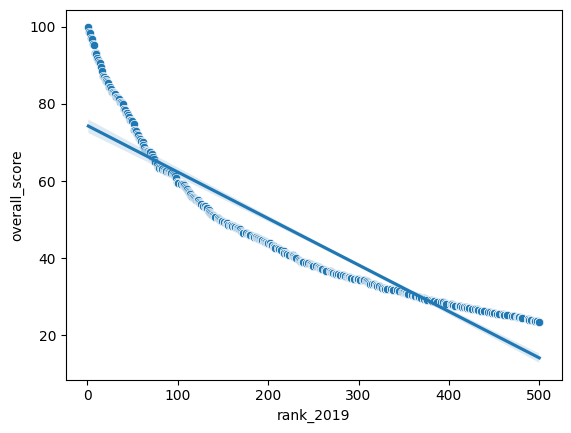

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="rank_2019", y="overall_score", data=df2019_new)

# Add a line of best fit to the scatter plot
sns.regplot(x="rank_2019", y="overall_score", data=df2019_new, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("rank_2019")
plt.ylabel("overall_score")

# Show the plot
plt.show()


Disini juga sama bahwa korelasi overall score sangat erat dengna ranking, dapat dikatakan bahwa penentuan rangking juga berdasarkan overall score

In [ ]:
# Define X and y
X = df2019_new[['classification', 'focus', 'research_intensity', 'age',
       'status', 'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank',]]
y = df2019_new['overall_score']


In [ ]:
from scipy.stats import spearmanr

for col in X.columns:
    corr, pval = spearmanr(X[col], y)
    print(f"Correlation between {col} and overall_score: {corr:.3f}, p-value: {pval:.3f}")

Correlation between classification and overall_score: nan, p-value: nan
Correlation between focus and overall_score: nan, p-value: nan
Correlation between research_intensity and overall_score: nan, p-value: nan
Correlation between age and overall_score: 0.313, p-value: 0.000
Correlation between status and overall_score: nan, p-value: nan
Correlation between academic_reputation_score and overall_score: 0.853, p-value: 0.000
Correlation between academic_reputation_rank and overall_score: -0.853, p-value: 0.000
Correlation between employer_reputation_score and overall_score: 0.732, p-value: 0.000
Correlation between employer_reputation_rank and overall_score: -0.726, p-value: 0.000
Correlation between faculty_student_score and overall_score: 0.334, p-value: 0.000
Correlation between faculty_student_rank and overall_score: -0.337, p-value: 0.000
Correlation between citations_score and overall_score: 0.553, p-value: 0.000
Correlation between citations_rank and overall_score: -0.552, p-value

In [ ]:
import statsmodels.api as sm

def backward_selection(X, y, p_value_threshold=0.05):
    """Perform backward selection to select significant features using OLS regression."""
    features = X.columns.tolist()
    while len(features) > 1:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        max_p_value = model.pvalues.drop('const').max()
        if max_p_value >= p_value_threshold:
            max_p_value_feature = model.pvalues.idxmax()
            features.remove(max_p_value_feature)
        else:
            break
    return features

def forward_selection(X, y, p_value_threshold=0.05):
    """Perform forward selection to select significant features using OLS regression."""
    features = []
    remaining_features = X.columns.tolist()
    while len(remaining_features) > 0:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[features + [feature]])).fit()
            p_values.append((feature, model.pvalues[feature]))
        p_values.sort(key=lambda x: x[1])
        min_p_value_feature, min_p_value = p_values[0]
        if min_p_value <= p_value_threshold:
            features.append(min_p_value_feature)
            remaining_features.remove(min_p_value_feature)
        else:
            break
    return features
selected_features_backward = backward_selection(X_train, y_train)
selected_features_forward = forward_selection(X_train, y_train)
print("Selected features (backward selection):", selected_features_backward)
print("Selected features (forward selection):", selected_features_forward)


Selected features (backward selection): ['age', 'academic_reputation_score', 'employer_reputation_score', 'faculty_student_score', 'citations_score', 'international_faculty_score', 'international_student_score']
Selected features (forward selection): ['academic_reputation_score', 'faculty_student_score', 'citations_score', 'international_student_score', 'employer_reputation_score', 'international_faculty_score', 'age']


Dapat dilihat hasilnya juga sama, maka dapat dinyatakan selama tahun 2018 dan 2019, penentuan overall score menggunakan X yang sama

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define X and y
X = df2019_new[[ 'age',
       'academic_reputation_score',
       'employer_reputation_score',
       'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score']]
y = df2019_new['overall_score']


# Add constant to X
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for each feature
print(vif)

                       feature        VIF
0                        const  39.654165
1                          age   1.156931
2    academic_reputation_score   3.535472
3    employer_reputation_score   2.997637
4        faculty_student_score   1.117152
5              citations_score   1.442454
6  international_faculty_score   1.932195
7  international_student_score   1.863117


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Membuat model regresi logistik ordinal
model = sm.OLS(y, X)

# Menyesuaikan model dengan data
result = model.fit()

# Melihat hasil regresi
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          overall_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.773e+07
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        12:56:42   Log-Likelihood:                 1033.6
No. Observations:                 490   AIC:                            -2051.
Df Residuals:                     482   BIC:                            -2018.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#2022

## Visualisasi

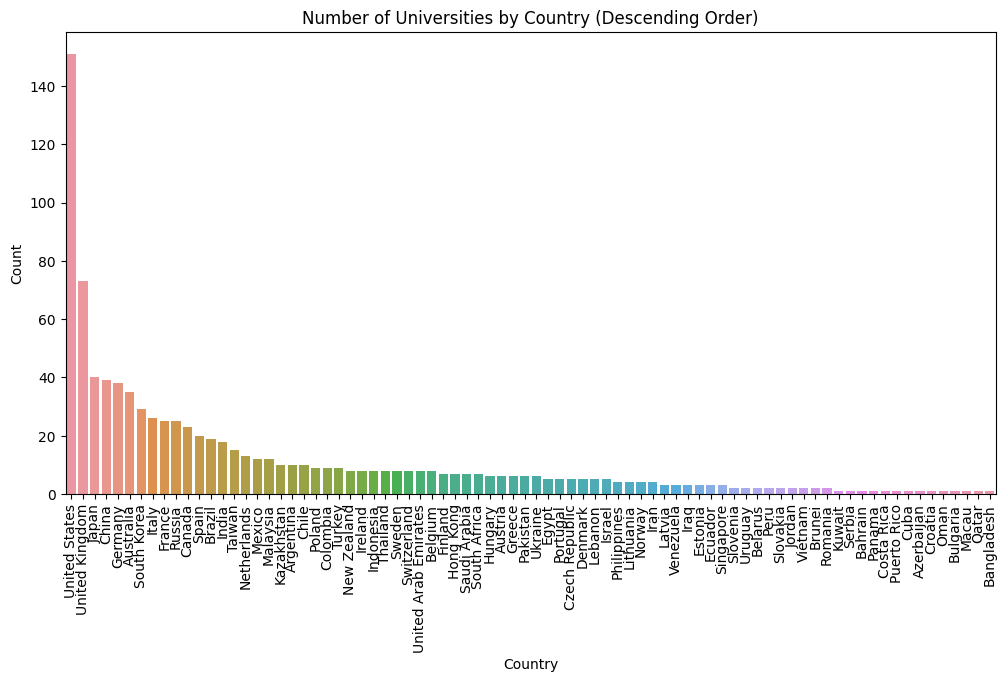

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of universities by country and sort them in descending order
country_counts = df2021_2022['country'].value_counts().sort_values(ascending=False)

# Create a countplot of the countries
plt.figure(figsize=(12,6))
sns.countplot(data=df2021_2022, x='country', order=country_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Universities by Country (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [ ]:
len(df2021_2022['country'].unique())


80

In [ ]:
# Count the number of universities in each country
country_counts = df2021_2022['country'].value_counts()

# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


           Country  Count
0    United States    151
1   United Kingdom     73
2            Japan     40
3            China     39
4          Germany     38
..             ...    ...
69            Oman      1
68        Bulgaria      1
67           Macau      1
66           Qatar      1
79      Bangladesh      1

[80 rows x 2 columns]


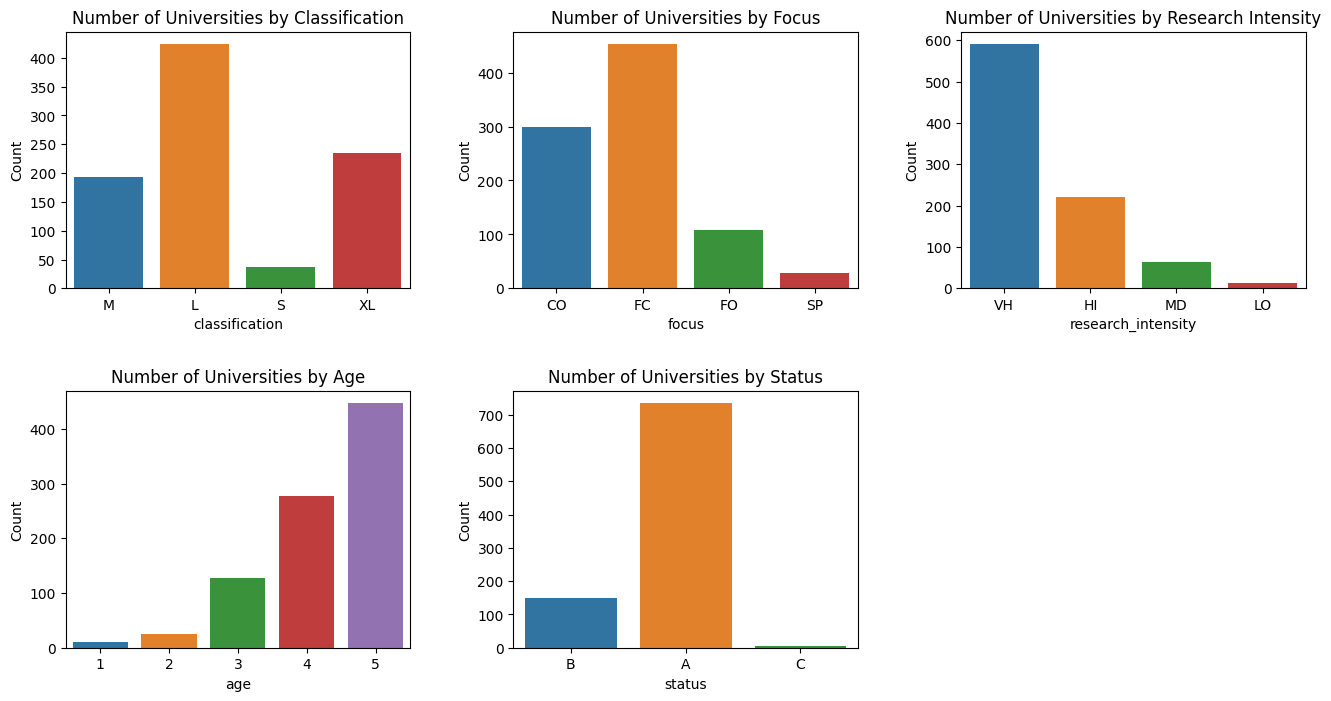

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot for Classification
sns.countplot(data=df2021_2022, x='classification', ax=axes[0, 0])
axes[0, 0].set_title('Number of Universities by Classification')

# Plot for Focus
sns.countplot(data=df2021_2022, x='focus', ax=axes[0, 1])
axes[0, 1].set_title('Number of Universities by Focus')

# Plot for Research Intensity
sns.countplot(data=df2021_2022, x='research_intensity', ax=axes[0, 2])
axes[0, 2].set_title('Number of Universities by Research Intensity')

# Plot for Age
sns.countplot(data=df2021_2022, x='age', ax=axes[1, 0])
axes[1, 0].set_title('Number of Universities by Age')

# Plot for Status
sns.countplot(data=df2021_2022, x='status', ax=axes[1, 1])
axes[1, 1].set_title('Number of Universities by Status')

# Remove empty plot
fig.delaxes(axes[1, 2])

# Set y-axis label
for ax in axes.flatten():
    ax.set_ylabel('Count')

plt.show()


In [ ]:
classification_counts = df2021_2022['classification'].value_counts()
focus_counts = df2021_2022['focus'].value_counts()
research_intensity_counts = df2021_2022['research_intensity'].value_counts()
age_counts = df2021_2022['age'].value_counts()
status_counts = df2021_2022['status'].value_counts()

In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'age': age_counts.index, 'Count': age_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('age', ascending=False, inplace=True)
print(df_counts)


   age  Count
0    5    447
1    4    277
2    3    127
3    2     26
4    1     11


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'classification': classification_counts.index, 'Count': classification_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


  classification  Count
0              L    424
1             XL    234
2              M    193
3              S     37


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'research_intensity': research_intensity_counts.index, 'Count': research_intensity_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('research_intensity', ascending=False, inplace=True)
print(df_counts)

  research_intensity  Count
0                 VH    591
2                 MD     65
3                 LO     12
1                 HI    220


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'focus': focus_counts.index, 'Count': focus_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('focus', ascending=False, inplace=True)
print(df_counts)


  focus  Count
3    SP     28
2    FO    108
0    FC    453
1    CO    299


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'status': status_counts.index, 'Count': status_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('status', ascending=False, inplace=True)
print(df_counts)


  status  Count
2      C      6
1      B    148
0      A    734


## Preparation

In [ ]:
df2021_2022

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,801-1000,"Vietnam National University, Hanoi",Vietnam,XL,FO,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,9 - 14.1
884,801-1000,801-1000,Voronezh State University,Russia,L,CO,HI,5,A,-,...,-,37.3,420,-,-,-,-,16.3,580,9 - 14.1
885,801-1000,801-1000,Vytautas Magnus University,Lithuania,M,FO,VH,4,A,-,...,-,-,-,-,-,17.4,583,-,-,9 - 14.1
886,801-1000,801-1000,Wroc?aw University of Science and Technology,Poland,L,FO,VH,5,A,-,...,-,26.3,564,-,-,-,-,-,-,9 - 14.1


In [ ]:
df2021_2022['rank_2022'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '  11=', '13',
       '14', '15', '16', '17', '  18=', '20', '21', '  22=', '24',
       '  25=', '27', '28', '  29=', '31', '32', '  33=', '  35=', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '54', '55', '56', '57', '  58=', '  60=',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '  72=', '74', '75', '76', '77', '  78=', '80', '81', '82', '83',
       '  83=', '84', '85', '86', '87', '89', '90', '91', '92', '  93=',
       '95', '96', '97', '  98=', '100', '101', '102', '103', '  104=',
       '106', '107', '  108=', '110', '111', '112', '113', '114', '115',
       '  116=', '118', '119', '  120=', '123', '124', '  125=', '125',
       '126', '127', '128', '129', '  130=', '  132=', '134', '135',
       '136', '137', '138', '139', '  140=', '144', '145', '146', '147',
       '148', '149', '150', '151', '152', '153', '  154=', '  156=',


In [ ]:
# List of values to drop
drop_values = ['501-510', '511-520', '521-530',
       '531-540', '541-550', '551-560', '561-570', '571-580', '581-590',
       '591-600', '601-650', '651-700', '701-750', '751-800',
       '  801-1000']

# Drop the rows that contain these values
df2021_2022_new = df2021_2022[~df2021_2022['rank_2022'].isin(drop_values)]
df2021_2022_new

,rank_2022,rank_2021,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,491=,439=,University of Delaware,United States,L,CO,VH,5,A,11,...,501+,11.6,601+,67.1,107,39.3,401,22.5,501,24.3
481,491=,481=,V.N. Karazin Kharkiv National University,Ukraine,L,FC,MD,5,A,10.8,...,501+,72.2,183,1.8,601+,1.3,601+,78.4,150,24.3
482,498=,531-540,Czech Technical University In Prague,Czech Republic,L,SP,VH,5,A,18.7,...,237,33.9,454,10.6,601+,18.2,569,57.5,248,24.2
483,498=,422=,Université de Montpellier,France,XL,CO,VH,1,A,20.3,...,488,13.1,601+,42.8,304,20.1,547,39.3,348,24.2


In [ ]:
# Split the values in rank_2018 column by "=" character
split_values = df2021_2022_new['rank_2022'].str.split('=')

# Replace the values in rank_2018 column with the first element of split_values
df2021_2022_new['rank_2022'] = split_values.str[0]

# Convert rank_2018 column to numeric data type
df2021_2022_new['rank_2022'] = pd.to_numeric(df2021_2022_new['rank_2022'])


In [ ]:
# Split the values in rank_2018 column by "+" character
split_values = df2021_2022_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(lambda x: x.str.split('+', expand=True)[0])

# Replace the values in rank_2018 column with the split values
df2021_2022_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = split_values

# Condf2019_newvert rank_2018 column to numeric data type
df2021_2022_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = df2021_2022_new[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(pd.to_numeric)



In [ ]:
# Drop the 'rank_2017' column
df2021_2022_new = df2021_2022_new.drop('rank_2021', axis=1)


In [ ]:
df2021_2022_new = df2021_2022_new.replace('-', np.nan)
df2021_2022_new.isna().sum()
# Replace NaN with 0 in the entire dataframe
df2021_2022_new = df2021_2022_new.fillna(0)

In [ ]:
# Replace missing values with 0
df2021_2022_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2021_2022_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score' ]].fillna(0)

# Convert column to integer type
df2021_2022_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2021_2022_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']].astype(float)


In [ ]:
df2021_2022_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 484
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank_2022                    485 non-null    int64  
 1   institution                  485 non-null    object 
 2   country                      485 non-null    object 
 3   classification               485 non-null    object 
 4   focus                        485 non-null    object 
 5   research_intensity           485 non-null    object 
 6   age                          485 non-null    int64  
 7   status                       485 non-null    object 
 8   academic_reputation_score    485 non-null    float64
 9   academic_reputation_rank     485 non-null    int64  
 10  employer_reputation_score    485 non-null    float64
 11  employer_reputation_rank     485 non-null    int64  
 12  faculty_student_score        485 non-null    float64
 13  faculty_student_rank

In [ ]:
df2021_2022_new

,rank_2022,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100.0,5,...,4,100.0,15,99.8,7,100.0,43,94.1,87,100.0
1,2,Stanford University,United States,L,FC,VH,5,B,100.0,4,...,5,100.0,12,98.6,13,99.8,62,67.7,196,98.4
2,3,Harvard University,United States,L,FC,VH,5,B,100.0,1,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,University of Oxford,United Kingdom,L,FC,VH,5,A,100.0,3,...,3,100.0,8,84.7,45,99.7,64,98.5,50,97.2
4,5,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,23,...,74,100.0,4,100.0,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,491,University of Delaware,United States,L,CO,VH,5,A,11.0,501,...,501,11.6,601,67.1,107,39.3,401,22.5,501,24.3
481,491,V.N. Karazin Kharkiv National University,Ukraine,L,FC,MD,5,A,10.8,501,...,501,72.2,183,1.8,601,1.3,601,78.4,150,24.3
482,498,Czech Technical University In Prague,Czech Republic,L,SP,VH,5,A,18.7,443,...,237,33.9,454,10.6,601,18.2,569,57.5,248,24.2
483,498,Université de Montpellier,France,XL,CO,VH,1,A,20.3,409,...,488,13.1,601,42.8,304,20.1,547,39.3,348,24.2


## Machine Learning

In [ ]:
df2021_2022_new = df2021_2022_new.drop('institution', axis=1)
df2021_2022_new = df2021_2022_new.drop('country', axis=1)
df2021_2022_new

,rank_2022,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,M,CO,VH,5,B,100.0,5,100.0,4,100.0,15,99.8,7,100.0,43,94.1,87,100.0
1,2,L,FC,VH,5,B,100.0,4,100.0,5,100.0,12,98.6,13,99.8,62,67.7,196,98.4
2,3,L,FC,VH,5,B,100.0,1,100.0,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,L,FC,VH,5,A,100.0,3,100.0,3,100.0,8,84.7,45,99.7,64,98.5,50,97.2
4,5,S,CO,VH,5,B,97.8,23,81.2,74,100.0,4,100.0,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,491,L,CO,VH,5,A,11.0,501,10.2,501,11.6,601,67.1,107,39.3,401,22.5,501,24.3
481,491,L,FC,MD,5,A,10.8,501,11.4,501,72.2,183,1.8,601,1.3,601,78.4,150,24.3
482,498,L,SP,VH,5,A,18.7,443,39.7,237,33.9,454,10.6,601,18.2,569,57.5,248,24.2
483,498,XL,CO,VH,1,A,20.3,409,18.8,488,13.1,601,42.8,304,20.1,547,39.3,348,24.2


In [ ]:
# membuat dictionary untuk mapping
encode_dict_classification = {'XL': 3, 'L': 2, 'M': 1, 'S': 0}
# melakukan mapping dengan method 'map'
df2021_2022_new['classification'] = df2021_2022_new['classification'].map(encode_dict_classification)

# membuat dictionary untuk mapping
encode_dict_focus = {'FC': 3, 'CO': 2, 'FO': 1, 'SP': 0}
# melakukan mapping dengan method 'map'
df2021_2022_new['focus'] = df2021_2022_new['focus'].map(encode_dict_focus)

# membuat dictionary untuk mapping
encode_dict_research_intensity = {'VH': 3, 'HI': 2, 'MD': 1, 'LO': 0}
# melakukan mapping dengan method 'map'
df2021_2022_new['research_intensity'] = df2021_2022_new['research_intensity'].map(encode_dict_research_intensity)

# membuat dictionary untuk mapping
encode_dict_status = {'A': 0, 'B': 1}
# melakukan mapping dengan method 'map'
df2021_2022_new['status'] = df2021_2022_new['status'].map(encode_dict_status)


In [ ]:
df2021_2022_new.corr()

,rank_2022,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
rank_2022,1.000000,-0.185095,-0.274967,-0.327925,-0.299107,-0.031057,-0.853298,0.854022,-0.741307,0.717222,-0.324204,0.321316,-0.528713,0.520728,-0.393857,0.386383,-0.375066,0.378701,-0.932437
classification,-0.185095,1.000000,0.448093,0.092377,0.185804,-0.240936,0.407576,-0.458851,0.240841,-0.249495,-0.286549,0.279408,0.006994,-0.043931,-0.065623,0.079971,-0.126754,0.114903,0.163458
focus,-0.274967,0.448093,1.000000,0.032093,0.245893,0.055969,0.360136,-0.378697,0.152060,-0.142063,0.034599,-0.038753,0.051578,-0.062507,0.035967,-0.015092,-0.062139,0.066158,0.255212
research_intensity,-0.327925,0.092377,0.032093,1.000000,0.161334,-0.209265,0.237616,-0.269997,0.109825,-0.097683,-0.077911,0.079357,0.435643,-0.413966,0.127440,-0.122074,0.085276,-0.080588,0.271209
age,-0.299107,0.185804,0.245893,0.161334,1.000000,0.062756,0.289762,-0.296953,0.230669,-0.214723,0.102235,-0.099296,0.167269,-0.178626,-0.016210,0.033962,0.023406,-0.015411,0.283956
status,-0.031057,-0.240936,0.055969,-0.209265,0.062756,1.000000,0.015201,0.023936,0.102344,-0.076405,0.283272,-0.274339,-0.047675,0.075646,-0.112731,0.119450,0.019985,-0.034262,0.094597
academic_reputation_score,-0.853298,0.407576,0.360136,0.237616,0.289762,0.015201,1.000000,-0.940119,0.799148,-0.753345,0.159652,-0.154291,0.419841,-0.403896,0.210199,-0.206566,0.208908,-0.215982,0.909432
academic_reputation_rank,0.854022,-0.458851,-0.378697,-0.269997,-0.296953,0.023936,-0.940119,1.000000,-0.745483,0.740048,-0.088191,0.088603,-0.383239,0.375006,-0.183600,0.177715,-0.152860,0.163602,-0.825491
employer_reputation_score,-0.741307,0.240841,0.152060,0.109825,0.230669,0.102344,0.799148,-0.745483,1.000000,-0.963813,0.139503,-0.139481,0.306879,-0.295092,0.230772,-0.227045,0.269114,-0.277595,0.793012
employer_reputation_rank,0.717222,-0.249495,-0.142063,-0.097683,-0.214723,-0.076405,-0.753345,0.740048,-0.963813,1.000000,-0.091139,0.094774,-0.270238,0.261638,-0.210900,0.207131,-0.230658,0.240615,-0.729586


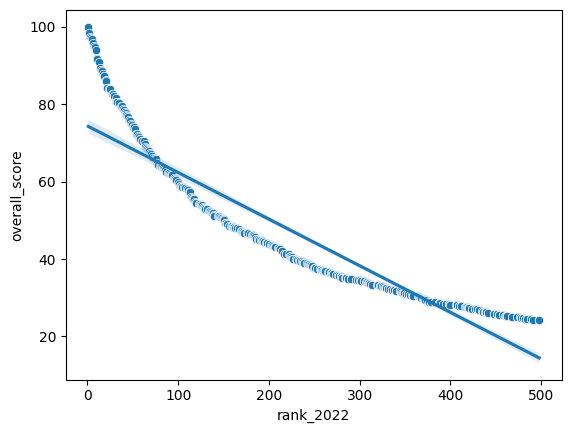

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="rank_2022", y="overall_score", data=df2021_2022_new)

# Add a line of best fit to the scatter plot
sns.regplot(x="rank_2022", y="overall_score", data=df2021_2022_new, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("rank_2022")
plt.ylabel("overall_score")

# Show the plot
plt.show()


In [ ]:
# Define X and y
X = df2021_2022_new[['classification', 'focus', 'research_intensity', 'age',
       'status', 'academic_reputation_score', 'academic_reputation_rank',
       'employer_reputation_score', 'employer_reputation_rank',
       'faculty_student_score', 'faculty_student_rank', 'citations_score',
       'citations_rank', 'international_faculty_score',
       'international_faculty_rank', 'international_student_score',
       'international_student_rank',]]
y = df2021_2022_new['overall_score']


In [ ]:
from scipy.stats import spearmanr

for col in X.columns:
    corr, pval = spearmanr(X[col], y)
    print(f"Correlation between {col} and overall_score: {corr:.3f}, p-value: {pval:.3f}")

Correlation between classification and overall_score: 0.189, p-value: 0.000
Correlation between focus and overall_score: 0.286, p-value: 0.000
Correlation between research_intensity and overall_score: 0.334, p-value: 0.000
Correlation between age and overall_score: 0.323, p-value: 0.000
Correlation between status and overall_score: nan, p-value: nan
Correlation between academic_reputation_score and overall_score: 0.861, p-value: 0.000
Correlation between academic_reputation_rank and overall_score: -0.861, p-value: 0.000
Correlation between employer_reputation_score and overall_score: 0.736, p-value: 0.000
Correlation between employer_reputation_rank and overall_score: -0.725, p-value: 0.000
Correlation between faculty_student_score and overall_score: 0.332, p-value: 0.000
Correlation between faculty_student_rank and overall_score: -0.331, p-value: 0.000
Correlation between citations_score and overall_score: 0.526, p-value: 0.000
Correlation between citations_rank and overall_score: -0.

In [ ]:
import statsmodels.api as sm

def backward_selection(X, y, p_value_threshold=0.05):
    """Perform backward selection to select significant features using OLS regression."""
    features = X.columns.tolist()
    while len(features) > 1:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        max_p_value = model.pvalues.drop('const').max()
        if max_p_value >= p_value_threshold:
            max_p_value_feature = model.pvalues.idxmax()
            features.remove(max_p_value_feature)
        else:
            break
    return features

def forward_selection(X, y, p_value_threshold=0.05):
    """Perform forward selection to select significant features using OLS regression."""
    features = []
    remaining_features = X.columns.tolist()
    while len(remaining_features) > 0:
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[features + [feature]])).fit()
            p_values.append((feature, model.pvalues[feature]))
        p_values.sort(key=lambda x: x[1])
        min_p_value_feature, min_p_value = p_values[0]
        if min_p_value <= p_value_threshold:
            features.append(min_p_value_feature)
            remaining_features.remove(min_p_value_feature)
        else:
            break
    return features
selected_features_backward = backward_selection(X_train, y_train)
selected_features_forward = forward_selection(X_train, y_train)
print("Selected features (backward selection):", selected_features_backward)
print("Selected features (forward selection):", selected_features_forward)


Selected features (backward selection): ['age', 'academic_reputation_score', 'employer_reputation_score', 'faculty_student_score', 'citations_score', 'international_faculty_score', 'international_student_score']
Selected features (forward selection): ['academic_reputation_score', 'faculty_student_score', 'citations_score', 'international_student_score', 'employer_reputation_score', 'international_faculty_score', 'age']


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define X and y
X = df2021_2022_new[[ 'age',
       'academic_reputation_score',
       'employer_reputation_score',
       'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score']]
y = df2021_2022_new['overall_score']


# Add constant to X
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for each feature
print(vif)

                       feature        VIF
0                        const  31.332012
1                          age   1.113255
2    academic_reputation_score   3.224966
3    employer_reputation_score   2.874791
4        faculty_student_score   1.140720
5              citations_score   1.465043
6  international_faculty_score   2.043479
7  international_student_score   1.946559


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Membuat model regresi logistik ordinal
model = sm.OLS(y, X)

# Menyesuaikan model dengan data
result = model.fit()

# Melihat hasil regresi
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:          overall_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.827e+07
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        13:13:06   Log-Likelihood:                 1030.6
No. Observations:                 485   AIC:                            -2045.
Df Residuals:                     477   BIC:                            -2012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             




1.   Didapat bahwa penentuan rangking berdsarkan overall_score
2.   Data yang berpengaruh untuk overall_score ialah 'academic_reputation_score', 'faculty_student_score', 'citations_score', 'international_student_score', 'employer_reputation_score', 'international_faculty_score', 'age'dengan academic_reputation_score, faculty_student_score, dan citations_score, memiliki signifikansi paling besar.





#2023

## Visualisasi

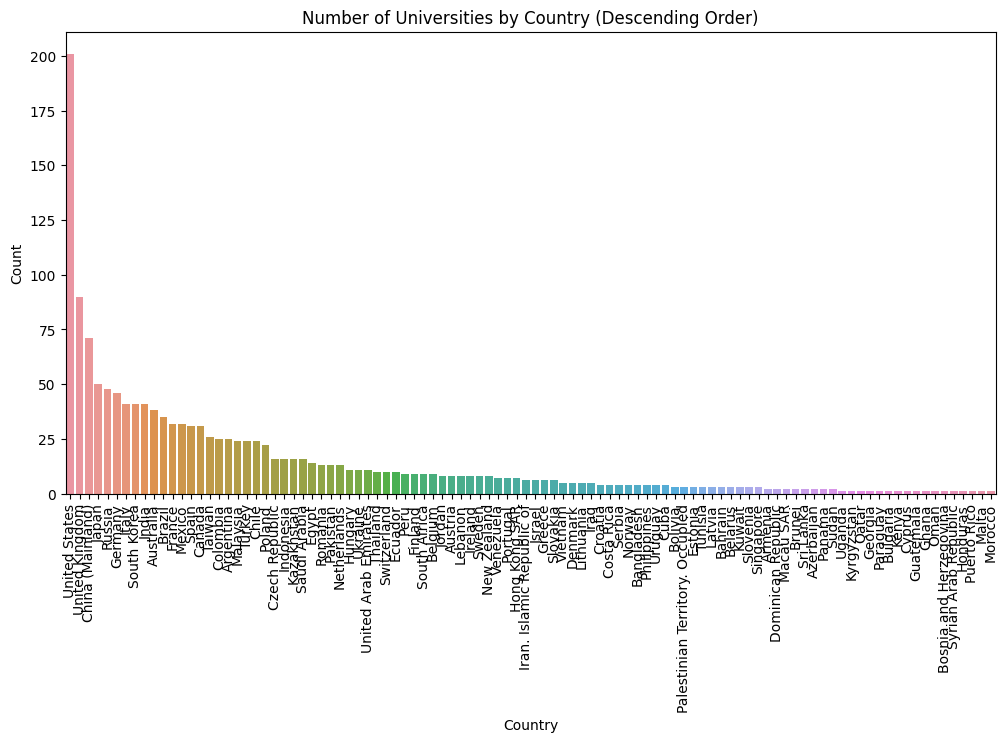

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of universities by country and sort them in descending order
country_counts = df2023['country'].value_counts().sort_values(ascending=False)

# Create a countplot of the countries
plt.figure(figsize=(12,6))
sns.countplot(data=df2023, x='country', order=country_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Universities by Country (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [ ]:
len(df2023['country'].unique())

100

In [ ]:
# Count the number of universities in each country
country_counts = df2023['country'].value_counts()

# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


                 Country  Count
0          United States    201
1         United Kingdom     90
2       China (Mainland)     71
3                  Japan     50
4                 Russia     48
..                   ...    ...
86  Syrian Arab Republic      1
85              Honduras      1
84           Puerto Rico      1
83                 Malta      1
99               Morocco      1

[100 rows x 2 columns]


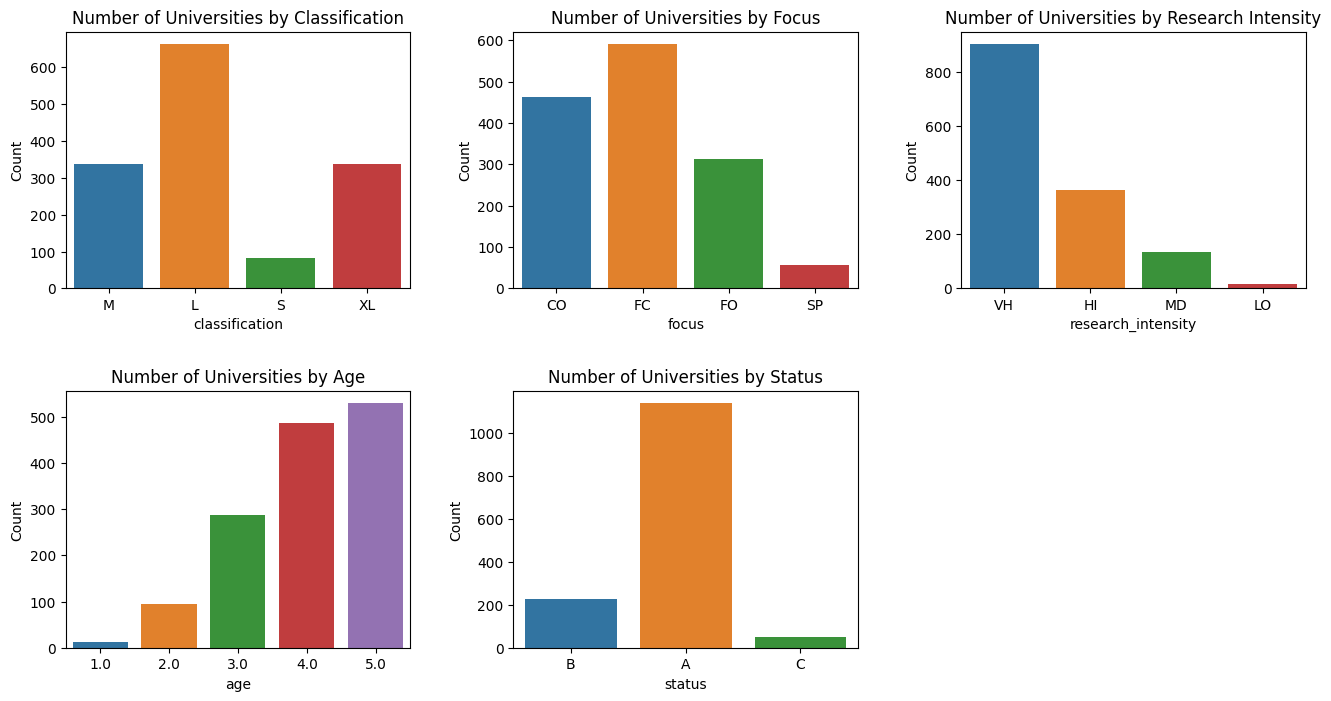

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot for Classification
sns.countplot(data=df2023, x='classification', ax=axes[0, 0])
axes[0, 0].set_title('Number of Universities by Classification')

# Plot for Focus
sns.countplot(data=df2023, x='focus', ax=axes[0, 1])
axes[0, 1].set_title('Number of Universities by Focus')

# Plot for Research Intensity
sns.countplot(data=df2023, x='research_intensity', ax=axes[0, 2])
axes[0, 2].set_title('Number of Universities by Research Intensity')

# Plot for Age
sns.countplot(data=df2023, x='age', ax=axes[1, 0])
axes[1, 0].set_title('Number of Universities by Age')

# Plot for Status
sns.countplot(data=df2023, x='status', ax=axes[1, 1])
axes[1, 1].set_title('Number of Universities by Status')

# Remove empty plot
fig.delaxes(axes[1, 2])

# Set y-axis label
for ax in axes.flatten():
    ax.set_ylabel('Count')

plt.show()


In [ ]:
classification_counts = df2023['classification'].value_counts()
focus_counts = df2023['focus'].value_counts()
research_intensity_counts = df2023['research_intensity'].value_counts()
age_counts = df2023['age'].value_counts()
status_counts = df2023['status'].value_counts()

In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'age': age_counts.index, 'Count': age_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('age', ascending=False, inplace=True)
print(df_counts)


   age  Count
0  5.0    529
1  4.0    486
2  3.0    288
3  2.0     95
4  1.0     13


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'classification': classification_counts.index, 'Count': classification_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('Count', ascending=False, inplace=True)
print(df_counts)


  classification  Count
0              L    663
1              M    338
2             XL    338
3              S     83


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'research_intensity': research_intensity_counts.index, 'Count': research_intensity_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('research_intensity', ascending=False, inplace=True)
print(df_counts)

  research_intensity  Count
0                 VH    903
2                 MD    133
3                 LO     18
1                 HI    363


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'focus': focus_counts.index, 'Count': focus_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('focus', ascending=False, inplace=True)
print(df_counts)


  focus  Count
3    SP     56
2    FO    312
0    FC    591
1    CO    462


In [ ]:
# Create a new DataFrame to store the counts
df_counts = pd.DataFrame({'status': status_counts.index, 'Count': status_counts.values})

# Display the table sorted by the count in descending order
df_counts.sort_values('status', ascending=False, inplace=True)
print(df_counts)


  status  Count
2      C     50
1      B    229
0      A   1139


## Preparation

In [ ]:
df2023

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501+,5.8,501+,3.6,601+,1.0,601+,1.7,601+,NaN,NaN,-
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501+,5.8,501+,2.4,601+,2.2,601+,9.3,601+,1.3,601+,-
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501+,2.6,501+,3.2,601+,3.6,601+,5.2,601+,2.8,601+,-
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501+,1.8,501+,2.7,601+,2.0,601+,NaN,NaN,NaN,NaN,-


In [ ]:
# Split the values in rank_2018 column by "+" character
split_values = df2023[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(lambda x: x.str.split('+', expand=True)[0])

# Replace the values in rank_2018 column with the split values
df2023[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = split_values

# Condf2019_newvert rank_2018 column to numeric data type
df2023[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']] = df2023[['academic_reputation_rank', 'employer_reputation_rank', 'faculty_student_rank', 'citations_rank', 'international_faculty_rank', 'international_student_rank']].apply(pd.to_numeric)



In [ ]:
df2023_new = df2023.replace('-', np.nan)
df2023_new.isna().sum()
# Replace NaN with 0 in the entire dataframe
df2023_new = df2023_new.fillna(0)

In [ ]:
# Replace missing values with 0
df2023_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2023_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score' ]].fillna(0)

# Convert column to integer type
df2023_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']] = df2023_new[['academic_reputation_score',
        'employer_reputation_score',
        'faculty_student_score', 
       'citations_score', 
       'international_faculty_score', 
       'international_student_score','overall_score']].astype(float)


In [ ]:
df2023_new.isna().sum()

institution                    0
country                        0
classification                 0
focus                          0
research_intensity             0
age                            0
status                         0
academic_reputation_score      0
academic_reputation_rank       0
employer_reputation_score      0
employer_reputation_rank       0
faculty_student_score          0
faculty_student_rank           0
citations_score                0
citations_rank                 0
international_faculty_score    0
international_faculty_rank     0
international_student_score    0
international_student_rank     0
overall_score                  0
dtype: int64

In [ ]:
df2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   country                      1422 non-null   object 
 2   classification               1422 non-null   object 
 3   focus                        1422 non-null   object 
 4   research_intensity           1422 non-null   object 
 5   age                          1422 non-null   float64
 6   status                       1422 non-null   object 
 7   academic_reputation_score    1422 non-null   float64
 8   academic_reputation_rank     1422 non-null   int64  
 9   employer_reputation_score    1422 non-null   float64
 10  employer_reputation_rank     1422 non-null   int64  
 11  faculty_student_score        1422 non-null   float64
 12  faculty_student_rank         1422 non-null   int64  
 13  citations_score   

In [ ]:
df2023_new['international_faculty_rank'] = df2023_new['international_faculty_rank'].astype(int)
df2023_new['international_student_rank'] = df2023_new['international_student_rank'].astype(int)


In [ ]:
df2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   institution                  1422 non-null   object 
 1   country                      1422 non-null   object 
 2   classification               1422 non-null   object 
 3   focus                        1422 non-null   object 
 4   research_intensity           1422 non-null   object 
 5   age                          1422 non-null   float64
 6   status                       1422 non-null   object 
 7   academic_reputation_score    1422 non-null   float64
 8   academic_reputation_rank     1422 non-null   int64  
 9   employer_reputation_score    1422 non-null   float64
 10  employer_reputation_rank     1422 non-null   int64  
 11  faculty_student_score        1422 non-null   float64
 12  faculty_student_rank         1422 non-null   int64  
 13  citations_score   

In [ ]:
df2023_new

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100.0
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501,5.8,501,3.6,601,1.0,601,1.7,601,0.0,0,0.0
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501,5.8,501,2.4,601,2.2,601,9.3,601,1.3,601,0.0
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501,2.6,501,3.2,601,3.6,601,5.2,601,2.8,601,0.0
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501,1.8,501,2.7,601,2.0,601,0.0,0,0.0,0,0.0


## Machine learning

In [ ]:
df2023_new

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100.0
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501,5.8,501,3.6,601,1.0,601,1.7,601,0.0,0,0.0
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501,5.8,501,2.4,601,2.2,601,9.3,601,1.3,601,0.0
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501,2.6,501,3.2,601,3.6,601,5.2,601,2.8,601,0.0
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501,1.8,501,2.7,601,2.0,601,0.0,0,0.0,0,0.0


In [ ]:
df2023_new.tail()

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501,5.8,501,3.6,601,1.0,601,1.7,601,0.0,0,0.0
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501,5.8,501,2.4,601,2.2,601,9.3,601,1.3,601,0.0
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501,2.6,501,3.2,601,3.6,601,5.2,601,2.8,601,0.0
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501,1.8,501,2.7,601,2.0,601,0.0,0,0.0,0,0.0
1421,University of Oradea,Romania,L,FC,MD,4.0,A,4.0,501,2.1,501,3.3,601,1.5,601,1.7,601,7.9,601,0.0


In [ ]:
# Add a new column called rank_2023 and compute the ranking based on overall_score
df2023_new['rank_2023'] = df2023_new['overall_score'].rank(ascending=False)
df2023_new['rank_2023'] = df2023_new['rank_2023'].astype(int)

# Sort the dataframe by rank_2023 in ascending order
df2023_new = df2023_new.sort_values('rank_2023', ascending=True)


print('Top 3 University')
print(df2023_new[['institution', 'overall_score', 'rank_2023']].head(3))



Top 3 University
                                    institution  overall_score  rank_2023
0  Massachusetts Institute of Technology (MIT)           100.0          1
1                       University of Cambridge           98.8          2
2                           Stanford University           98.5          3


In [ ]:
print('Top bottom 3 University')
df2023_zero = df2023_new[df2023_new['overall_score'] == 0]
print(df2023_zero[['institution', 'overall_score','rank_2023']])


Top bottom 3 University
                                 institution  overall_score  rank_2023
1112                Universidad Andrs Bello            0.0        961
1108           The University of Northampton            0.0        961
1115      Universidad Aut¢noma de Nuevo Le¢n            0.0        961
1109                        Tokai University            0.0        961
1110           Tomas Bata University in Zlin            0.0        961
...                                      ...            ...        ...
813                  Beirut Arab University             0.0        961
958         University of Central Lancashire            0.0        961
789   Universidade de Santiago de Compostela            0.0        961
814                   Bournemouth University            0.0        961
1421                    University of Oradea            0.0        961

[922 rows x 3 columns]


In [ ]:
num_univ_with_zero_score = len(df2023_new[df2023_new['overall_score'] == 0])
print('Jumlah universitas dengan overall_score 0:', num_univ_with_zero_score)


Jumlah universitas dengan overall_score 0: 922


In [ ]:
df2023_nonzero_sorted = df2023_new[df2023_new['overall_score'] > 0].sort_values('overall_score', ascending=True).head(3)
print('Top bottom 3 University')                                                                                                                      
print(df2023_nonzero_sorted[['institution', 'overall_score','rank_2023']])


Top bottom 3 University
                          institution  overall_score  rank_2023
499  University of Rome "Tor Vergata"           24.2        499
498          Central South University           24.2        499
496               Brandeis University           24.3        497


In [ ]:
print('Top bottom 3 Universities')
df2023_zero = df2023_new[df2023_new['overall_score'] == 0]
df2023_nonzero = df2023_zero[df2023_zero['overall_score'] != 0] # memeriksa nilai tidak sama dengan 0
df2023_nonzero_sorted = df2023_nonzero.sort_values('overall_score').head(3) # mengambil 3 terbawah

print(df2023_nonzero_sorted[['institution', 'overall_score']])


Top bottom 3 Universities
Empty DataFrame
Columns: [institution, overall_score]
Index: []


In [ ]:
df2023_zero

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023
1116,Universidad de Castilla-La Mancha,Spain,L,FC,HI,3.0,A,8.4,501,2.0,...,16.9,601,9.6,601,2.2,601,5.1,601,0.0,961.5
1115,Universidad Aut¢noma de Nuevo Le¢n,Mexico,XL,FC,HI,4.0,A,15.2,501,15.9,...,2.5,601,1.8,601,3.3,601,1.2,601,0.0,961.5
1107,The University of Lahore,Pakistan,XL,FO,HI,2.0,B,8.2,501,16.0,...,14.4,601,2.0,601,2.9,601,2.2,601,0.0,961.5
1114,Universidad Aut¢noma de Aguascalientes,Mexico,L,FC,MD,3.0,A,3.2,501,1.8,...,36.7,425,1.4,601,0.0,0,0.0,0,0.0,961.5
1113,Universidad Austral de Chile,Chile,L,FC,HI,4.0,B,15.5,501,11.6,...,3.8,601,6.7,601,17.5,601,2.1,601,0.0,961.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Beijing University of Chinese Medicine,China (Mainland),M,FC,VH,2.0,A,4.4,501,1.4,...,38.0,405,6.8,601,0.0,0,10.1,601,0.0,961.5
812,Beijing University of Posts and Telecommunicat...,China (Mainland),L,CO,VH,3.0,A,2.9,501,2.0,...,10.9,601,42.6,325,5.6,601,1.9,601,0.0,961.5
813,Beirut Arab University,Lebanon,M,FC,MD,4.0,B,9.8,501,15.9,...,14.3,601,2.3,601,70.1,257,43.5,319,0.0,961.5
815,Budapest University of Technology and Economics,Hungary,L,FO,VH,5.0,A,14.6,501,19.8,...,17.0,601,8.8,601,2.5,601,19.4,546,0.0,961.5


In [ ]:
df2023_zero

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023
1116,Universidad de Castilla-La Mancha,Spain,L,FC,HI,3.0,A,8.4,501,2.0,...,16.9,601,9.6,601,2.2,601,5.1,601,0.0,961.5
1115,Universidad Aut¢noma de Nuevo Le¢n,Mexico,XL,FC,HI,4.0,A,15.2,501,15.9,...,2.5,601,1.8,601,3.3,601,1.2,601,0.0,961.5
1107,The University of Lahore,Pakistan,XL,FO,HI,2.0,B,8.2,501,16.0,...,14.4,601,2.0,601,2.9,601,2.2,601,0.0,961.5
1114,Universidad Aut¢noma de Aguascalientes,Mexico,L,FC,MD,3.0,A,3.2,501,1.8,...,36.7,425,1.4,601,0.0,0,0.0,0,0.0,961.5
1113,Universidad Austral de Chile,Chile,L,FC,HI,4.0,B,15.5,501,11.6,...,3.8,601,6.7,601,17.5,601,2.1,601,0.0,961.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Beijing University of Chinese Medicine,China (Mainland),M,FC,VH,2.0,A,4.4,501,1.4,...,38.0,405,6.8,601,0.0,0,10.1,601,0.0,961.5
812,Beijing University of Posts and Telecommunicat...,China (Mainland),L,CO,VH,3.0,A,2.9,501,2.0,...,10.9,601,42.6,325,5.6,601,1.9,601,0.0,961.5
813,Beirut Arab University,Lebanon,M,FC,MD,4.0,B,9.8,501,15.9,...,14.3,601,2.3,601,70.1,257,43.5,319,0.0,961.5
815,Budapest University of Technology and Economics,Hungary,L,FO,VH,5.0,A,14.6,501,19.8,...,17.0,601,8.8,601,2.5,601,19.4,546,0.0,961.5


In [ ]:
df2023_zero = df2023_zero.drop(df2023_zero[df2023_zero['overall_score'] == 0].index)

In [ ]:
df2023_zero

,institution,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023


#student performance

In [ ]:
dfstudent = pd.read_csv('student_performance_2022-2023.csv')
dfstudent 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954
996,male,group C,high school,free/reduced,none,62,55,55,National Taiwan University of Science and Tech...,84614760
997,female,group C,high school,free/reduced,completed,59,71,65,University of Basel,57161539
998,female,group D,some college,standard,completed,68,78,77,Texas A&M University,22522604


## eksplorasi

In [ ]:
dfstudent.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'university', 'student_id'],
      dtype='object')

Periksa nilai unik pada kolom gender, rasis, parental level of education, lunch, dan test preparation course

Gender

In [ ]:
dfstudent['gender'].nunique()


In [ ]:
dfstudent['gender'].unique()

In [ ]:
dfstudent['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

'race/ethnicity

In [ ]:
dfstudent['race/ethnicity'].nunique()

In [ ]:
dfstudent['race/ethnicity'].unique()

In [ ]:
dfstudent['race/ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%')

parental level of education

In [ ]:
dfstudent['parental level of education'].nunique()

In [ ]:
dfstudent['parental level of education'].unique()

In [ ]:
dfstudent['parental level of education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

lunch

In [ ]:
dfstudent['lunch'].nunique()

In [ ]:
dfstudent['lunch'].unique()

In [ ]:
dfstudent['lunch'].value_counts().plot(kind='pie', autopct='%1.1f%%')

test preparation course

In [ ]:
dfstudent['test preparation course'].nunique()

In [ ]:
dfstudent['test preparation course'].unique()

In [ ]:
dfstudent['test preparation course'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## rangking nilai

### math

In [ ]:
# Create a new dataframe with selected columns
dfstudent_math = dfstudent[['student_id', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','math score', 'university']]

# Print the new dataframe
dfstudent_math.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,university
0,27330634,female,group B,bachelor's degree,standard,none,72,University of Essex
1,92958629,female,group C,some college,standard,completed,69,National Central University
2,31367409,female,group B,master's degree,standard,none,90,Université de Montpellier
3,97210441,male,group A,associate's degree,free/reduced,none,47,Washington State University
4,99937559,male,group C,some college,standard,none,76,Keele University


In [ ]:
# Add a new column called rank_2023 and compute the ranking based on overall_score
dfstudent_math['rank math'] = dfstudent_math['math score'].rank(ascending=False)

# Sort the dataframe by rank_2023 in descending order
dfstudent_math = dfstudent_math.sort_values('math score', ascending=False)

# Print the new dataframe
dfstudent_math.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,university,rank math
962,35523441,female,group E,associate's degree,standard,none,100,Keio University,4.0
625,84000392,male,group D,some college,standard,completed,100,Karaganda State Technical University,4.0
458,93852536,female,group E,bachelor's degree,standard,none,100,University of Wisconsin-Madison,4.0
623,40343645,male,group A,some college,standard,completed,100,University College Cork (UCC),4.0
451,88656583,female,group E,some college,standard,none,100,Vellore Institute of Technology (VIT),4.0


In [ ]:
# Count the number of students with each score value and normalize the counts
score_counts = dfstudent_math['math score'].value_counts(normalize=True)

# Multiply the proportion of the score value of interest (i.e., 100) by the total number of students
num_students_with_score_100 = score_counts.loc[100] * len(dfstudent_math)

# Print the result
print("Number of students with a score of 100 in the 'math score' column:", num_students_with_score_100)


Number of students with a score of 100 in the 'math score' column: 7.0


### reading

In [ ]:
# Create a new dataframe with selected columns
dfstudent_reading= dfstudent[['student_id', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','reading score', 'university']]

# Print the new dataframe
dfstudent_reading.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,university
0,27330634,female,group B,bachelor's degree,standard,none,72,University of Essex
1,92958629,female,group C,some college,standard,completed,90,National Central University
2,31367409,female,group B,master's degree,standard,none,95,Université de Montpellier
3,97210441,male,group A,associate's degree,free/reduced,none,57,Washington State University
4,99937559,male,group C,some college,standard,none,78,Keele University


In [ ]:
# Add a new column called rank_2023 and compute the ranking based on overall_score
dfstudent_reading['rank reading'] = dfstudent_reading['reading score'].rank(ascending=False)

# Sort the dataframe by rank_2023 in descending order
dfstudent_reading = dfstudent_reading.sort_values('reading score', ascending=False)

# Print the new dataframe
dfstudent_reading.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,university,rank reading
546,99276950,female,group A,some high school,standard,completed,100,ITMO University,9.0
970,84554881,female,group D,bachelor's degree,standard,none,100,Tsinghua University,9.0
149,81712618,male,group E,associate's degree,free/reduced,completed,100,Universidad de Puerto Rico,9.0
566,94844963,female,group E,bachelor's degree,free/reduced,completed,100,University of Rochester,9.0
712,18835214,female,group D,some college,standard,none,100,Gwangju Institute of Science and Technology (G...,9.0


In [ ]:
# Count the number of students with each score value and normalize the counts
score_counts = dfstudent_reading['reading score'].value_counts(normalize=True)

# Multiply the proportion of the score value of interest (i.e., 100) by the total number of students
num_students_with_score_100 = score_counts.loc[100] * len(dfstudent_reading)

# Print the result
print("Number of students with a score of 100 in the 'reading score' column:", num_students_with_score_100)


Number of students with a score of 100 in the 'reading score' column: 17.0


### writing

In [ ]:
# Create a new dataframe with selected columns
dfstudent_writing= dfstudent[['student_id', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','writing score', 'university']]

# Print the new dataframe
dfstudent_writing.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,university
0,27330634,female,group B,bachelor's degree,standard,none,74,University of Essex
1,92958629,female,group C,some college,standard,completed,88,National Central University
2,31367409,female,group B,master's degree,standard,none,93,Université de Montpellier
3,97210441,male,group A,associate's degree,free/reduced,none,44,Washington State University
4,99937559,male,group C,some college,standard,none,75,Keele University


In [ ]:
# Add a new column called rank_2023 and compute the ranking based on overall_score
dfstudent_writing['writing reading'] = dfstudent_writing['writing score'].rank(ascending=False)

# Sort the dataframe by rank_2023 in descending order
dfstudent_writing = dfstudent_writing.sort_values('writing score', ascending=False)

# Print the new dataframe
dfstudent_writing.head()


,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,university,writing reading
179,21672834,female,group D,some high school,standard,completed,100,Swansea University,7.5
114,99131099,female,group E,bachelor's degree,standard,completed,100,University of Oklahoma,7.5
903,38163409,female,group D,bachelor's degree,free/reduced,completed,100,University of Liege,7.5
403,23679876,female,group D,high school,standard,completed,100,Pontificia Universidad Católica de Valparaíso,7.5
458,93852536,female,group E,bachelor's degree,standard,none,100,University of Wisconsin-Madison,7.5


In [ ]:
# Count the number of students with each score value and normalize the counts
score_counts = dfstudent_writing['writing score'].value_counts(normalize=True)

# Multiply the proportion of the score value of interest (i.e., 100) by the total number of students
num_students_with_score_100 = score_counts.loc[100] * len(dfstudent_writing)

# Print the result
print("Number of students with a score of 100 in the 'writing score' column:", num_students_with_score_100)


Number of students with a score of 100 in the 'writing score' column: 14.0


### overall

In [ ]:
dfstudent['average_score'] = dfstudent[['math score',	'reading score',	'writing score']].mean(axis=1)


In [ ]:
# Add a new column called rank_2023 and compute the ranking based on overall_score
dfstudent['average rank'] = dfstudent['average_score'].rank(ascending=False)

# Change data type of 'average rank' column to integer
dfstudent['average rank'] = dfstudent['average rank'].astype(int)

# Sort the dataframe by rank_2023 in descending order
dfstudent = dfstudent.sort_values('average_score', ascending=False)

# Print the new dataframe
dfstudent.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,average_score,average rank
916,male,group E,bachelor's degree,standard,completed,100,100,100,Monash University,56712636,100.000000,2
458,female,group E,bachelor's degree,standard,none,100,100,100,University of Wisconsin-Madison,93852536,100.000000,2
962,female,group E,associate's degree,standard,none,100,100,100,Keio University,35523441,100.000000,2
114,female,group E,bachelor's degree,standard,completed,99,100,100,University of Oklahoma,99131099,99.666667,4
179,female,group D,some high school,standard,completed,97,100,100,Swansea University,21672834,99.000000,5


##join dengan rank 2023

In [ ]:
df2023_new = df2023_new.rename(columns={'institution': 'university'})


In [ ]:
merged_df = pd.merge(dfstudent, df2023_new, on='university', how='left')
merged_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023
0,male,group E,5,standard,completed,100,100,100,Monash University,56712636,...,11.2,601.0,79.3,113.0,100.0,48.0,100.0,18.0,71.6,57.0
1,female,group E,5,standard,none,100,100,100,University of Wisconsin-Madison,93852536,...,70.6,184.0,41.9,333.0,37.7,421.0,23.8,482.0,63.7,83.0
2,female,group E,4,standard,none,100,100,100,Keio University,35523441,...,60.3,258.0,6.6,601.0,10.6,601.0,12.4,601.0,44.1,197.0
3,female,group E,5,standard,completed,99,100,100,University of Oklahoma,99131099,...,16.6,601.0,37.1,377.0,24.4,529.0,5.6,601.0,0.0,961.0
4,female,group D,1,standard,completed,97,100,100,Swansea University,21672834,...,25.9,570.0,24.4,497.0,72.8,247.0,52.8,274.0,27.2,426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,male,group E,1,standard,none,30,26,22,Case Western Reserve University,50449967,...,89.1,90.0,65.8,172.0,47.8,366.0,64.6,220.0,46.2,176.0
996,male,group A,3,free/reduced,none,28,23,19,University of Bern,12208956,...,64.9,223.0,98.3,22.0,100.0,41.0,41.9,329.0,55.7,120.0
997,male,group B,2,free/reduced,none,30,24,15,University of Wisconsin-Madison,77278678,...,70.6,184.0,41.9,333.0,37.7,421.0,23.8,482.0,63.7,83.0
998,female,group B,2,free/reduced,none,8,24,23,Sumy State University,48739717,...,45.0,342.0,2.1,601.0,3.2,601.0,64.6,219.0,0.0,961.0


In [ ]:
merged_df.sort_values(by=['rank_2023'], inplace=True)
merged_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023
967,male,group B,3,free/reduced,none,40,43,39,University of Cambridge,76787104,...,100.0,11.0,92.3,55.0,100.0,60.0,96.3,70.0,98.8,2.0
904,male,group B,2,standard,completed,52,49,46,Stanford University,47340088,...,100.0,6.0,99.9,9.0,99.8,74.0,60.3,235.0,98.5,3.0
366,female,group B,2,standard,none,65,81,73,Stanford University,49003614,...,100.0,6.0,99.9,9.0,99.8,74.0,60.3,235.0,98.5,3.0
173,female,group B,1,standard,none,82,82,80,Stanford University,94692466,...,100.0,6.0,99.9,9.0,99.8,74.0,60.3,235.0,98.5,3.0
193,male,group D,2,standard,none,88,78,75,University of Oxford,34891637,...,100.0,8.0,90.0,64.0,98.8,101.0,98.4,54.0,98.4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,male,group C,2,free/reduced,none,27,34,36,Universität Erlangen-Nürnberg,43541531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,male,group B,2,free/reduced,none,36,29,27,Universidad de la Habana,38397065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,male,group C,3,free/reduced,none,35,28,27,Birla Institute of Technology and Science,77389429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,female,group B,1,free/reduced,none,24,38,27,Università degli Studi di Torino (UNITO),13353974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'university', 'student_id', 'average_score',
       'average rank', 'country', 'classification', 'focus',
       'research_intensity', 'age', 'status', 'academic_reputation_score',
       'academic_reputation_rank', 'employer_reputation_score',
       'employer_reputation_rank', 'faculty_student_score',
       'faculty_student_rank', 'citations_score', 'citations_rank',
       'international_faculty_score', 'international_faculty_rank',
       'international_student_score', 'international_student_rank',
       'overall_score', 'rank_2023'],
      dtype='object')

In [ ]:
merged_df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
                 'test preparation course', 'student_id', 'classification', 'focus', 'research_intensity', 'age', 'status', 'academic_reputation_rank',
       'employer_reputation_rank',
       'faculty_student_rank', 'citations_rank',
        'international_faculty_rank',
        'international_student_rank','university', 'country','average rank'], axis=1, inplace=True)

In [ ]:
merged_df

,math score,reading score,writing score,average_score,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score,overall_score,rank_2023
967,40,43,39,40.666667,100.0,100.0,100.0,92.3,100.0,96.3,98.8,2.0
904,52,49,46,49.000000,100.0,100.0,100.0,99.9,99.8,60.3,98.5,3.0
366,65,81,73,73.000000,100.0,100.0,100.0,99.9,99.8,60.3,98.5,3.0
173,82,82,80,81.333333,100.0,100.0,100.0,99.9,99.8,60.3,98.5,3.0
193,88,78,75,80.333333,100.0,100.0,100.0,90.0,98.8,98.4,98.4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,27,34,36,32.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,36,29,27,30.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,35,28,27,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,24,38,27,29.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.corr()

,math score,reading score,writing score,average_score,academic_reputation_score,employer_reputation_score,faculty_student_score,citations_score,international_faculty_score,international_student_score,overall_score,rank_2023
math score,1.000000,0.817580,0.802642,0.918746,0.015355,-0.012697,0.066025,-0.019833,-0.023260,0.017423,0.010349,0.002933
reading score,0.817580,1.000000,0.954598,0.970331,-0.001939,-0.035197,0.051390,0.001046,-0.002563,0.026153,0.010483,-0.009241
writing score,0.802642,0.954598,1.000000,0.965667,-0.009781,-0.034375,0.033627,-0.012340,0.014693,0.035163,0.005918,-0.007552
average_score,0.918746,0.970331,0.965667,1.000000,0.001315,-0.028632,0.052758,-0.011046,-0.003903,0.027516,0.009323,-0.004775
academic_reputation_score,0.015355,-0.001939,-0.009781,0.001315,1.000000,0.820886,0.440609,0.491919,0.343172,0.325007,0.885608,-0.770382
employer_reputation_score,-0.012697,-0.035197,-0.034375,-0.028632,0.820886,1.000000,0.301215,0.326518,0.252920,0.256414,0.725379,-0.635899
faculty_student_score,0.066025,0.051390,0.033627,0.052758,0.440609,0.301215,1.000000,0.097997,0.088764,0.127550,0.550124,-0.492424
citations_score,-0.019833,0.001046,-0.012340,-0.011046,0.491919,0.326518,0.097997,1.000000,0.442256,0.286542,0.679893,-0.652289
international_faculty_score,-0.023260,-0.002563,0.014693,-0.003903,0.343172,0.252920,0.088764,0.442256,1.000000,0.751864,0.508563,-0.510782
international_student_score,0.017423,0.026153,0.035163,0.027516,0.325007,0.256414,0.127550,0.286542,0.751864,1.000000,0.455723,-0.432957


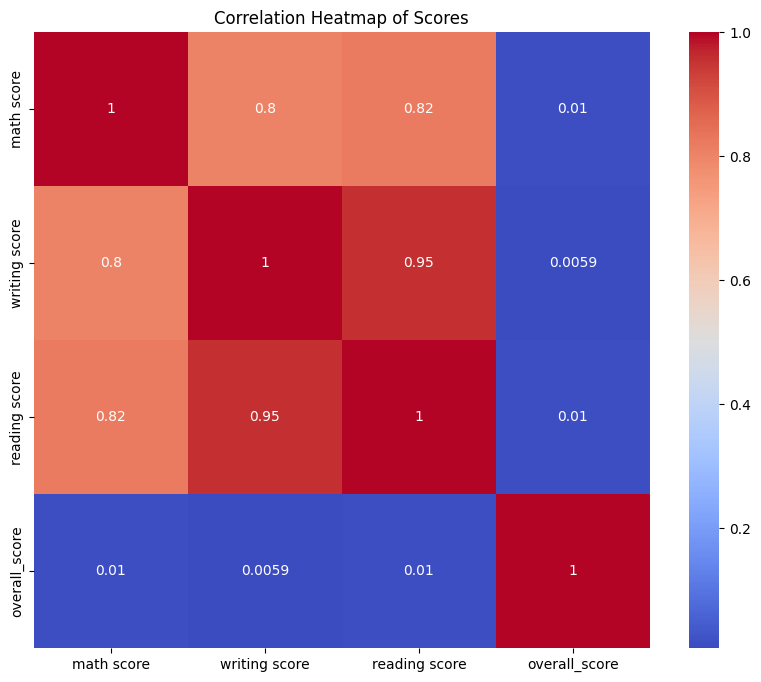

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'scores' with columns: math_score, writing_score, reading_score, overall_score
# Make sure your DataFrame has numerical values in these columns

# Create a correlation matrix
correlation_matrix = merged_df[['math score', 'writing score', 'reading score', 'overall_score']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Scores')

# Display the heatmap
plt.show()


Dapat dilihat dari korelasi antara nilai matematika, reading, dan wirting tidak berpengaruh besar kepada overall_score ataupun score -score yang lain.Mari kita lihat dalam bentuk korelasi yang lain

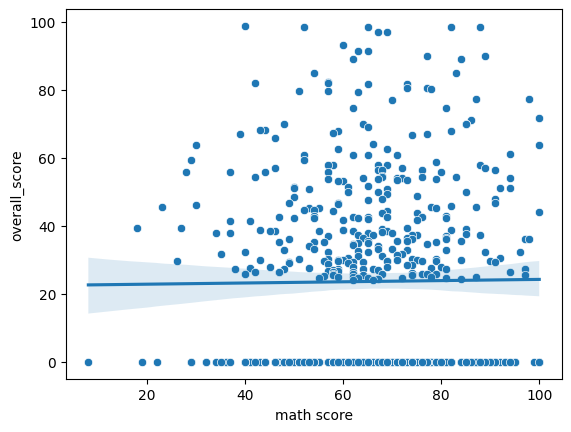

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="math score", y="overall_score", data=merged_df)

# Add a line of best fit to the scatter plot
sns.regplot(x="math score", y="overall_score", data=merged_df, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("math score")
plt.ylabel("overall_score")

# Show the plot
plt.show()


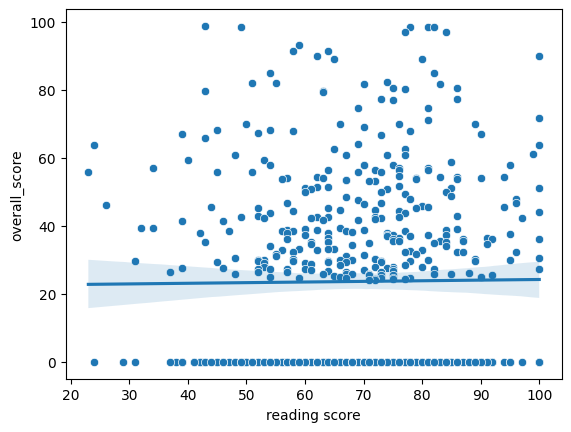

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="reading score", y="overall_score", data=merged_df)

# Add a line of best fit to the scatter plot
sns.regplot(x="reading score", y="overall_score", data=merged_df, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("reading score")
plt.ylabel("overall_score")

# Show the plot
plt.show()

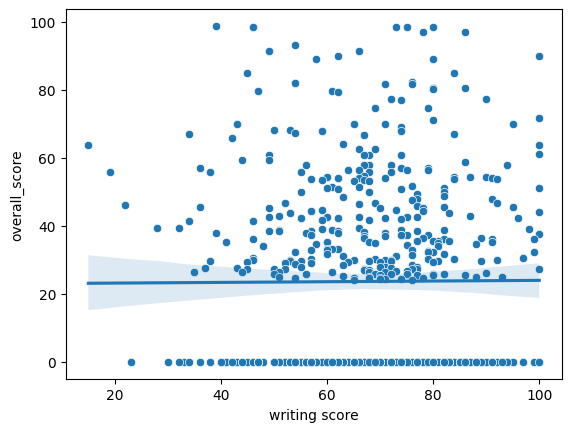

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with "rank" on the x-axis and "overall score" on the y-axis
sns.scatterplot(x="writing score", y="overall_score", data=merged_df)

# Add a line of best fit to the scatter plot
sns.regplot(x="writing score", y="overall_score", data=merged_df, scatter=False)

# Set the x-axis label and y-axis label
plt.xlabel("writing score")
plt.ylabel("overall_score")

# Show the plot
plt.show()

In [ ]:
# Define X and y
X = merged_df[['math score']]
y = merged_df['overall_score']


In [ ]:
from scipy.stats import spearmanr

for col in X.columns:
    corr, pval = spearmanr(X[col], y)
    print(f"Correlation between {col} and overall_score: {corr:.3f}, p-value: {pval:.3f}")

Correlation between math score and overall_score: nan, p-value: nan
Correlation between reading score and overall_score: nan, p-value: nan
Correlation between writing score and overall_score: nan, p-value: nan
Correlation between average_score and overall_score: nan, p-value: nan


Dapt dilihat bahwa dalam korelasi spearman saja, nilai nilai tersebut tidak berpengaruh pada overall_score yang mana secara tidak langusng tidak berpengaruh pada rangking

In [ ]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid


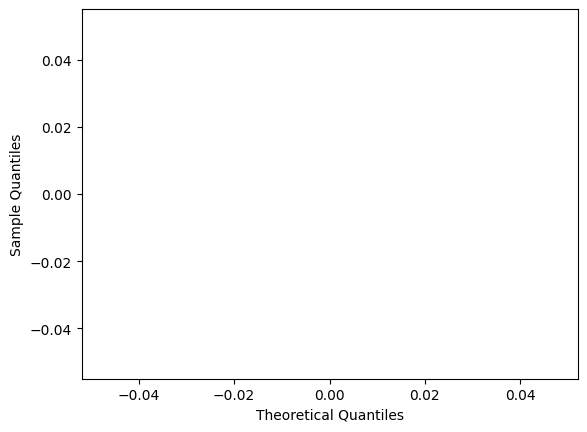


Shapiro-Wilk Test:
Statistic = nan, p-value = 1.000
Residual terdistribusi normal (tidak dapat menolak H0)


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

# Shapiro-Wilk test
stat_sw, p_sw = stats.shapiro(residuals)
print('\nShapiro-Wilk Test:')
print(f'Statistic = {stat_sw:.3f}, p-value = {p_sw:.3f}')
if p_sw > 0.05:
    print('Residual terdistribusi normal (tidak dapat menolak H0)')
else:
    print('Residual tidak terdistribusi normal (menolak H0)')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)


Variance Inflation Factor (VIF):
         Features  VIF
0     math score  inf
1  reading score  inf
2  writing score  inf
3  average_score  inf


Kesimpulan

Dari beberapa kali uji dapat diliaht bawah nilai matematika,reading,dan writing tidak memenngaruhi overall_score. Yang mana ini menjawab pertanyaan jika nilai mahassiwa bagus belum tentu diberada di Universitas top, maupun sebaliknya

## preparation

ubah data, karena akan melakukan machine learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

dfstudent['parental level of education'] = dfstudent['parental level of education'].replace({
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
})

# Menerapkan One-Hot Encoding pada kolom "race/ethnicity"
race_dummies = pd.get_dummies(dfstudent['race/ethnicity'], prefix='race')

# Menerapkan One-Hot Encoding pada kolom "gender"
gender_dummies = pd.get_dummies(dfstudent['gender'], prefix='gender')

# Menerapkan One-Hot Encoding pada kolom "lunch"
lunch_dummies = pd.get_dummies(dfstudent['lunch'], prefix='lunch')

# Menerapkan One-Hot Encoding pada kolom "test preparation course"
testprep_dummies = pd.get_dummies(dfstudent['test preparation course'], prefix='test_prep')

# Menggabungkan hasil One-Hot Encoding dengan DataFrame awal
dfstudent_encoded = pd.concat([dfstudent, race_dummies, gender_dummies, lunch_dummies, testprep_dummies], axis=1)

# Menghapus kolom asli yang telah di-encode
dfstudent_encoded.drop(['race/ethnicity', 'gender', 'lunch', 'test preparation course'], axis=1, inplace=True)



In [ ]:
dfstudent_encoded

,parental level of education,math score,reading score,writing score,university,student_id,average_score,average rank,race_group A,race_group B,race_group C,race_group D,race_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
916,5,100,100,100,Monash University,56712636,100.000000,2,0,0,0,0,1,0,1,0,1,1,0
458,5,100,100,100,University of Wisconsin-Madison,93852536,100.000000,2,0,0,0,0,1,1,0,0,1,0,1
962,4,100,100,100,Keio University,35523441,100.000000,2,0,0,0,0,1,1,0,0,1,0,1
114,5,99,100,100,University of Oklahoma,99131099,99.666667,4,0,0,0,0,1,1,0,0,1,1,0
179,1,97,100,100,Swansea University,21672834,99.000000,5,0,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,30,26,22,Case Western Reserve University,50449967,26.000000,995,0,0,0,0,1,0,1,0,1,0,1
327,3,28,23,19,University of Bern,12208956,23.333333,997,1,0,0,0,0,0,1,1,0,0,1
596,2,30,24,15,University of Wisconsin-Madison,77278678,23.000000,998,0,1,0,0,0,0,1,1,0,0,1
980,2,8,24,23,Sumy State University,48739717,18.333333,999,0,1,0,0,0,1,0,1,0,0,1


In [ ]:
dfstudent_1 = dfstudent_encoded.drop(columns=['university', 'student_id','average rank'])


In [ ]:
dfstudent_1.columns

In [ ]:
dfstudent_1.describe()

In [ ]:
dfstudent_1.corr()

,parental level of education,math score,reading score,writing score,average_score,race_group A,race_group B,race_group C,race_group D,race_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
parental level of education,1.000000,0.159432,0.190908,0.236715,0.205785,-0.063061,-0.070537,0.039925,0.015235,0.058563,0.043934,-0.043934,0.023259,-0.023259,-0.007143,0.007143
math score,0.159432,1.000000,0.817580,0.802642,0.918746,-0.091977,-0.084250,-0.073387,0.050071,0.205855,-0.167982,0.167982,-0.350877,0.350877,0.177702,-0.177702
reading score,0.190908,0.817580,1.000000,0.954598,0.970331,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.244313,-0.244313,-0.229560,0.229560,0.241780,-0.241780
writing score,0.236715,0.802642,0.954598,1.000000,0.965667,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.301225,-0.301225,-0.245769,0.245769,0.312946,-0.312946
average_score,0.205785,0.918746,0.970331,0.965667,1.000000,-0.104803,-0.078247,-0.030691,0.058902,0.141050,0.130861,-0.130861,-0.290064,0.290064,0.256710,-0.256710
race_group A,-0.063061,-0.091977,-0.096274,-0.110714,-0.104803,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.071001,0.071001,0.032329,-0.032329,-0.006315,0.006315
race_group B,-0.070537,-0.084250,-0.060283,-0.078254,-0.078247,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,0.028466,-0.028466,0.008257,-0.008257,-0.000106,0.000106
race_group C,0.039925,-0.073387,-0.003074,-0.010203,-0.030691,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.063368,-0.063368,0.003385,-0.003385,0.012522,-0.012522
race_group D,0.015235,0.050071,0.035177,0.082032,0.058902,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.030566,0.030566,0.009458,-0.009458,-0.055956,0.055956
race_group E,0.058563,0.205855,0.106712,0.089077,0.141050,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,-0.020302,0.020302,-0.052398,0.052398,0.059393,-0.059393


##math

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['parental level of education', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E', 'gender_female',
       'gender_male', 'lunch_free/reduced', 'lunch_standard',
       'test_prep_completed', 'test_prep_none']]
y = dfstudent_1['math score']

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)

Variance Inflation Factor (VIF):
                        Features       VIF
0                         const  0.000000
1   parental level of education  1.014624
2                  race_group A       inf
3                  race_group B       inf
4                  race_group C       inf
5                  race_group D       inf
6                  race_group E       inf
7                 gender_female       inf
8                   gender_male       inf
9            lunch_free/reduced       inf
10               lunch_standard       inf
11          test_prep_completed       inf
12               test_prep_none       inf


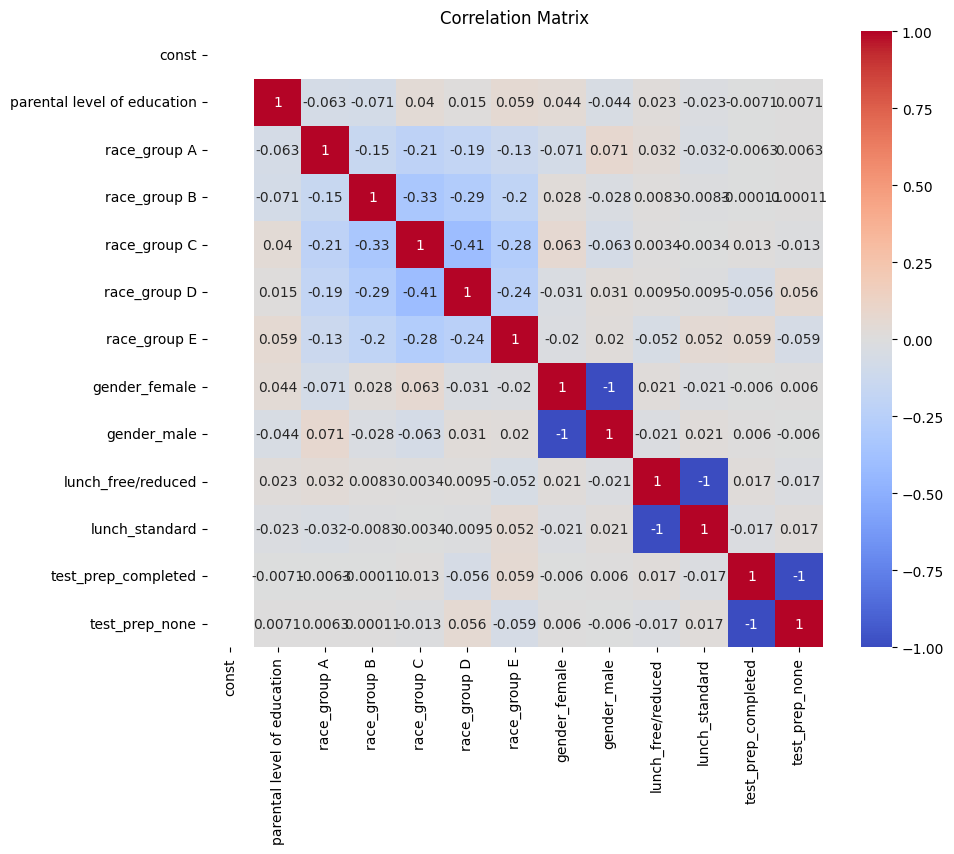

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = X.corr()

# Plotting matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


Karena saya sudah one hot encode, maka untuk corr yang berniali 1 atau -1, saya gunakan 1 saja dan untuk race group juga, saya hapus 1 saja dan mempertahankan 4 sisanya


Lalu saya ingin tau faktor X apa saja yang memenaruhi Y 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['parental level of education', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard',
       'test_prep_completed']]
y = dfstudent_1['math score']

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)


Variance Inflation Factor (VIF):
                       Features        VIF
0                        const  18.769098
1  parental level of education   1.014624
2                 race_group B   2.553677
3                 race_group C   3.160934
4                 race_group D   2.928818
5                 race_group E   2.241845
6                  gender_male   1.011373
7               lunch_standard   1.005152
8          test_prep_completed   1.006107


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['parental level of education', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard',
       'test_prep_completed']]
y = dfstudent_1['math score']


# F-statistic feature selection
model = sm.OLS(y, sm.add_constant(X)).fit()
selected_features_fstat = X.columns[model.pvalues[1:] < 0.05]

# Forward selection
selected_features_forward = []
while len(selected_features_forward) < len(X.columns):
    remaining_features = list(set(X.columns) - set(selected_features_forward))
    best_p_value = 1.0
    best_feature = None
    for feature in remaining_features:
        model = sm.OLS(y, sm.add_constant(X[selected_features_forward + [feature]])).fit()
        p_value = model.pvalues[feature]
        if p_value < best_p_value:
            best_p_value = p_value
            best_feature = feature
    if best_p_value < 0.05:
        selected_features_forward.append(best_feature)
    else:
        break

# Backward elimination
selected_features_backward = X.columns
while len(selected_features_backward) > 0:
    model = sm.OLS(y, sm.add_constant(X[selected_features_backward])).fit()
    max_p_value = model.pvalues[1:].max()
    if max_p_value >= 0.05:
        feature_to_remove = model.pvalues[1:].idxmax()
        selected_features_backward = selected_features_backward.drop(feature_to_remove)
    else:
        break

# LASSO feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_ != 0]

# RFE feature selection
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]

# Print the selected features
print("Selected Features using F-statistic:")
print(selected_features_fstat)
print("Selected Features using Forward Selection:")
print(selected_features_forward)
print("Selected Features using Backward Elimination:")
print(selected_features_backward)
print("Selected Features using LASSO:")
print(selected_features_lasso)
print("Selected Features using RFE:")
print(selected_features_rfe)


Selected Features using F-statistic:
Index(['parental level of education', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard', 'test_prep_completed'],
      dtype='object')
Selected Features using Forward Selection:
['lunch_standard', 'race_group E', 'test_prep_completed', 'parental level of education', 'gender_male', 'race_group D']
Selected Features using Backward Elimination:
Index(['parental level of education', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard', 'test_prep_completed'],
      dtype='object')
Selected Features using LASSO:
Index(['parental level of education', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard', 'test_prep_completed'],
      dtype='object')
Selected Features using RFE:
Index(['race_group D', 'race_group E', 'gender_male', 'lunch_standard',
       'test_prep_completed'],
      dtype='object')


In [ ]:
# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the OLS summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             math score   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              1893.
Date:                Sat, 13 May 2023   Prob (F-statistic):                        0.00
Time:                        02:30:00   Log-Likelihood:                         -4241.1
No. Observations:                1000   AIC:                                      8498.
Df Residuals:                     992   BIC:                                      8538.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.015,0.001688,0.008113,0.002792
1,K-Nearest Neighbors,0.025,0.012557,0.011568,0.011927
2,Support Vector Machines,0.030,0.004873,0.013624,0.005248
3,Decision Tree,0.010,0.011261,0.006081,0.007722
4,Random Forest,0.005,0.003571,0.003571,0.003571
5,AdaBoost,0.020,0.001182,0.016024,0.002035
6,Gradient Boosting,0.010,0.008889,0.007778,0.008254
7,Naive Bayes,0.010,0.001735,0.011416,0.002870
8,Neural Network,0.020,0.008200,0.011755,0.008866


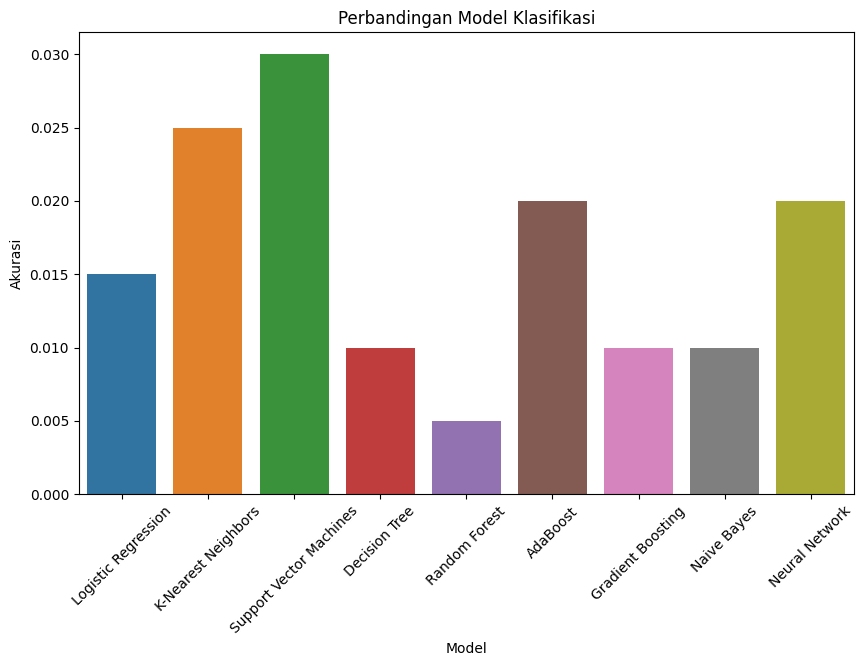

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier())
]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1


# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()


Walaupun dengan machine learning, akurasi yang didapat pun masih kecil, oleh karena itu data akan coba saya ubah menjadi data ordinal semua

mencoba memperkecil lagi target menjadi nilai sangat baik, baik, cukup dan kurang

In [ ]:
dfstudent_1['math score'] = dfstudent_1['math score'].div(25)
dfstudent_1['reading score'] = dfstudent_1['reading score'].div(25)
dfstudent_1['writing score'] = dfstudent_1['writing score'].div(25)

In [ ]:
bins = [0, 1.99, 2.99, 3.49, 4]
labels = [ 1, 2, 3, 4]
dfstudent_1['math score_cat'] = pd.cut(dfstudent_1['math score'],bins=bins, labels=labels)
dfstudent_1['reading score_cat'] = pd.cut(dfstudent_1['reading score'],bins=bins, labels=labels)
dfstudent_1['writing score_cat'] = pd.cut(dfstudent_1['writing score'],bins=bins, labels=labels)
dfstudent_1

,parental level of education,math score,reading score,writing score,average_score,race_group A,race_group B,race_group C,race_group D,race_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none,math score_cat,reading score_cat,writing score_cat
916,5,4.00,4.00,4.00,100.000000,0,0,0,0,1,0,1,0,1,1,0,4,4,4
458,5,4.00,4.00,4.00,100.000000,0,0,0,0,1,1,0,0,1,0,1,4,4,4
962,4,4.00,4.00,4.00,100.000000,0,0,0,0,1,1,0,0,1,0,1,4,4,4
114,5,3.96,4.00,4.00,99.666667,0,0,0,0,1,1,0,0,1,1,0,4,4,4
179,1,3.88,4.00,4.00,99.000000,0,0,0,1,0,1,0,0,1,1,0,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,1.20,1.04,0.88,26.000000,0,0,0,0,1,0,1,0,1,0,1,1,1,1
327,3,1.12,0.92,0.76,23.333333,1,0,0,0,0,0,1,1,0,0,1,1,1,1
596,2,1.20,0.96,0.60,23.000000,0,1,0,0,0,0,1,1,0,0,1,1,1,1
980,2,0.32,0.96,0.92,18.333333,0,1,0,0,0,1,0,1,0,0,1,1,1,1


In [ ]:
dfstudent_1.isna().sum()

parental level of education    0
math score                     0
reading score                  0
writing score                  0
average_score                  0
race_group A                   0
race_group B                   0
race_group C                   0
race_group D                   0
race_group E                   0
gender_female                  0
gender_male                    0
lunch_free/reduced             0
lunch_standard                 0
test_prep_completed            0
test_prep_none                 0
math score_cat                 1
reading score_cat              0
writing score_cat              0
dtype: int64

In [ ]:
dfstudent_1=dfstudent_1.fillna(1)

In [ ]:
dfstudent_1.isna().sum()

parental level of education    0
math score                     0
reading score                  0
writing score                  0
average_score                  0
race_group A                   0
race_group B                   0
race_group C                   0
race_group D                   0
race_group E                   0
gender_female                  0
gender_male                    0
lunch_free/reduced             0
lunch_standard                 0
test_prep_completed            0
test_prep_none                 0
math score_cat                 0
reading score_cat              0
writing score_cat              0
dtype: int64

In [ ]:
dfstudent_1['math score_cat'] = dfstudent_1['math score_cat'].astype(int)
dfstudent_1['reading score_cat'] = dfstudent_1['reading score_cat'].astype(int)
dfstudent_1['writing score_cat'] = dfstudent_1['writing score_cat'].astype(int)

In [ ]:
dfstudent_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 916 to 59
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   parental level of education  1000 non-null   int64  
 1   math score                   1000 non-null   float64
 2   reading score                1000 non-null   float64
 3   writing score                1000 non-null   float64
 4   average_score                1000 non-null   float64
 5   race_group A                 1000 non-null   uint8  
 6   race_group B                 1000 non-null   uint8  
 7   race_group C                 1000 non-null   uint8  
 8   race_group D                 1000 non-null   uint8  
 9   race_group E                 1000 non-null   uint8  
 10  gender_female                1000 non-null   uint8  
 11  gender_male                  1000 non-null   uint8  
 12  lunch_free/reduced           1000 non-null   uint8  
 13  lunch_standard    

In [ ]:
dfstudent_1.corr()

,parental level of education,math score,reading score,writing score,average_score,race_group A,race_group B,race_group C,race_group D,race_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none,math score_cat,reading score_cat,writing score_cat
parental level of education,1.000000,0.159432,0.190908,0.236715,0.205785,-0.063061,-0.070537,0.039925,0.015235,0.058563,0.043934,-0.043934,0.023259,-0.023259,-0.007143,0.007143,0.170757,0.177453,0.200202
math score,0.159432,1.000000,0.817580,0.802642,0.918746,-0.091977,-0.084250,-0.073387,0.050071,0.205855,-0.167982,0.167982,-0.350877,0.350877,0.177702,-0.177702,0.900055,0.727538,0.719333
reading score,0.190908,0.817580,1.000000,0.954598,0.970331,-0.096274,-0.060283,-0.003074,0.035177,0.106712,0.244313,-0.244313,-0.229560,0.229560,0.241780,-0.241780,0.730292,0.903767,0.861127
writing score,0.236715,0.802642,0.954598,1.000000,0.965667,-0.110714,-0.078254,-0.010203,0.082032,0.089077,0.301225,-0.301225,-0.245769,0.245769,0.312946,-0.312946,0.714867,0.856914,0.904229
average_score,0.205785,0.918746,0.970331,0.965667,1.000000,-0.104803,-0.078247,-0.030691,0.058902,0.141050,0.130861,-0.130861,-0.290064,0.290064,0.256710,-0.256710,0.822335,0.870857,0.870203
race_group A,-0.063061,-0.091977,-0.096274,-0.110714,-0.104803,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.071001,0.071001,0.032329,-0.032329,-0.006315,0.006315,-0.082165,-0.093192,-0.112371
race_group B,-0.070537,-0.084250,-0.060283,-0.078254,-0.078247,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,0.028466,-0.028466,0.008257,-0.008257,-0.000106,0.000106,-0.069884,-0.046134,-0.061696
race_group C,0.039925,-0.073387,-0.003074,-0.010203,-0.030691,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.063368,-0.063368,0.003385,-0.003385,0.012522,-0.012522,-0.069345,0.004867,0.003880
race_group D,0.015235,0.050071,0.035177,0.082032,0.058902,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.030566,0.030566,0.009458,-0.009458,-0.055956,0.055956,0.038969,0.018666,0.057962
race_group E,0.058563,0.205855,0.106712,0.089077,0.141050,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,-0.020302,0.020302,-0.052398,0.052398,0.059393,-0.059393,0.190199,0.098440,0.083302


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['parental level of education', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard',
       'test_prep_completed']]
y = dfstudent_1['math score_cat']

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the OLS summary
print(results.summary())

# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)


                            OLS Regression Results                            
Dep. Variable:         math score_cat   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     33.36
Date:                Sun, 14 May 2023   Prob (F-statistic):           9.74e-47
Time:                        07:18:06   Log-Likelihood:                -1052.5
No. Observations:                1000   AIC:                             2123.
Df Residuals:                     991   BIC:                             2167.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.555,0.327287,0.260244,0.221459
1,K-Nearest Neighbors,0.505,0.265925,0.275355,0.257804
2,Support Vector Machines,0.570,0.142500,0.250000,0.181529
3,Decision Tree,0.475,0.287606,0.285981,0.276868
4,Random Forest,0.490,0.337023,0.309373,0.313192
5,AdaBoost,0.560,0.349116,0.360109,0.336228
6,Gradient Boosting,0.535,0.305973,0.268306,0.249546
7,Naive Bayes,0.530,0.371080,0.300189,0.288402
8,Neural Network,0.570,0.537166,0.327841,0.336812


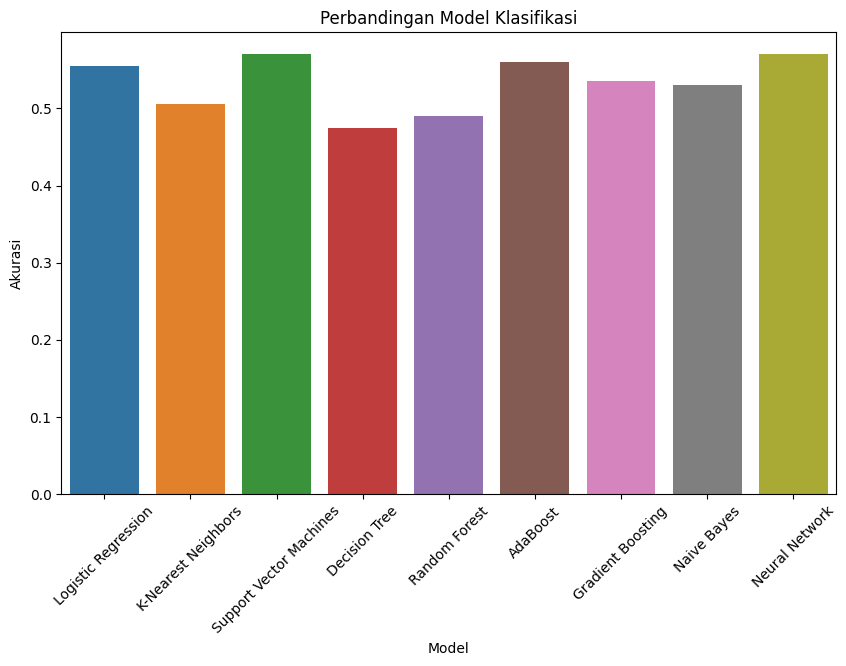

In [ ]:
# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier())
]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1


# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()


Saya ingin coba diperkecil menjadi 3 dan 4 menjadi nilai baik = 1 dan 1 dan2 menjadi nilai kurang baik = 0


In [ ]:
# Buat kolom baru 'math_score_binary'
dfstudent_1['math_score_binary'] = dfstudent_1['math score_cat'].apply(lambda x: 0 if x <= 2 else 1)

# Encoding kolom 'math score_cat' menjadi 0 dan 1
le = LabelEncoder()
dfstudent_1['math_score_binary'] = le.fit_transform(dfstudent_1['math_score_binary'])

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['parental level of education', 'race_group B',
       'race_group C', 'race_group D', 'race_group E',
       'gender_male', 'lunch_standard',
       'test_prep_completed']]
y = dfstudent_1['math_score_binary']

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the OLS summary
print(results.summary())

# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)

# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Print the coefficient (parameter) values
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

                            OLS Regression Results                            
Dep. Variable:      math_score_binary   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     20.33
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.19e-28
Time:                        07:18:23   Log-Likelihood:                -557.79
No. Observations:                1000   AIC:                             1134.
Df Residuals:                     991   BIC:                             1178.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.705,0.480000,0.206897,0.289157
1,K-Nearest Neighbors,0.705,0.486486,0.310345,0.378947
2,Support Vector Machines,0.710,0.500000,0.051724,0.093750
3,Decision Tree,0.670,0.388889,0.241379,0.297872
4,Random Forest,0.665,0.390244,0.275862,0.323232
5,AdaBoost,0.710,0.500000,0.241379,0.325581
6,Gradient Boosting,0.675,0.405405,0.258621,0.315789
7,Naive Bayes,0.720,0.527778,0.327586,0.404255
8,Neural Network,0.710,0.500000,0.293103,0.369565


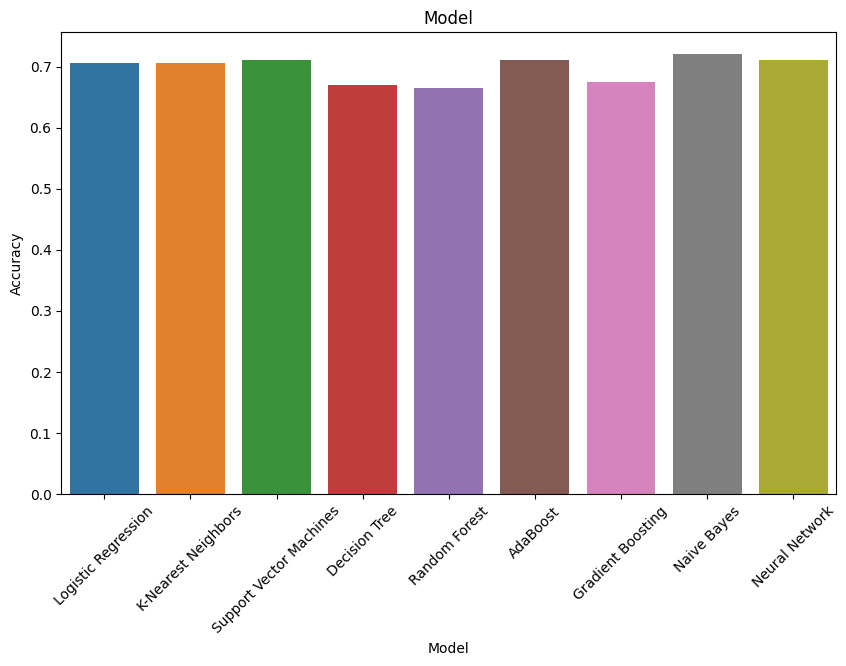

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier())
]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# hyperparameter yang akan diuji
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

# Mencari hyperparameter terbaik dengan cross-validation
logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", logreg_cv.best_params_)
print("Best Accuracy: ", logreg_cv.best_score_)

knn = KNeighborsClassifier()

# hyperparameter yang akan diuji
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Mencari hyperparameter terbaik dengan cross-validation
knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", knn_cv.best_params_)
print("Best Accuracy: ", knn_cv.best_score_)

svm = SVC()

# hyperparameter yang akan diuji
params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Mencari hyperparameter terbaik dengan cross-validation
svm_cv = GridSearchCV(svm, params, cv=5)
svm_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", svm_cv.best_params_)
print("Best Accuracy: ", svm_cv.best_score_)

dt = DecisionTreeClassifier()

# hyperparameter yang akan diuji
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Mencari hyperparameter terbaik dengan cross-validation
dt_cv = GridSearchCV(dt, params, cv=5)
dt_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", dt_cv.best_params_)
print("Best Accuracy: ", dt_cv.best_score_)

from sklearn.model_selection import GridSearchCV

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Set hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters: ", grid_search_rf.best_params_)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.model_selection import GridSearchCV

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Set hyperparameter yang akan diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Membuat objek GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid=param_grid, cv=5)

# Melatih model dengan GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters: ", grid_search_nb.best_params_)
print("Accuracy: {:.2f}".format(accuracy))



Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy:  0.72875
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy:  0.69625
Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy:  0.72375
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy:  0.73125
Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.70
Best Parameters:  {'var_smoothing': 1e-09}
Accuracy: 0.70


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(C=1, penalty='l2',solver= 'liblinear')
logreg.fit(X_train, y_train)
prediksi_logreg = logreg.predict(X_test)
akurasi_logreg = metrics.accuracy_score(y_test, prediksi_logreg)

#NV
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
prediksi_nb = naive_bayes.predict(X_test)
akurasi_nb = metrics.accuracy_score(y_test, prediksi_nb)

print('Akurasi Logistic Regression adalah:', "{:.2%}".format(akurasi_logreg))
print(metrics.classification_report(y_test, prediksi_logreg))

print('Akurasi Naive Bayes adalah:', "{:.2%}".format(akurasi_nb))
print(metrics.classification_report(y_test, prediksi_nb))



Akurasi Logistic Regression adalah: 71.67%
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       211
           1       0.55      0.24      0.33        89

    accuracy                           0.72       300
   macro avg       0.65      0.58      0.58       300
weighted avg       0.68      0.72      0.68       300

Akurasi Naive Bayes adalah: 71.67%
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       211
           1       0.54      0.33      0.41        89

    accuracy                           0.72       300
   macro avg       0.65      0.60      0.61       300
weighted avg       0.69      0.72      0.69       300



Dari hasil ini maka lebih baik menggunakan data biner karena akurasinya lebih baik, kelemahannya ialah hanya dapat menentukan nilai baik atau tidak berdasarkan asumsi 

## reading

In [ ]:
# Buat kolom baru 'math_score_binary'
dfstudent_1['reading_score_binary'] = dfstudent_1['reading score_cat'].apply(lambda x: 0 if x <= 2 else 1)


# Encoding kolom 'math score_cat' menjadi 0 dan 1
le = LabelEncoder()
dfstudent_1['reading_score_binary'] = le.fit_transform(dfstudent_1['reading_score_binary'])

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define dependent variable (Y) and independent variable (X)
X = dfstudent_1[['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','gender']]
y = dfstudent_1['reading_score_binary']

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.650,0.529412,0.369863,0.435484
1,K-Nearest Neighbors,0.630,0.492537,0.452055,0.471429
2,Support Vector Machines,0.625,0.468750,0.205479,0.285714
3,Decision Tree,0.595,0.420000,0.287671,0.341463
4,Random Forest,0.625,0.483333,0.397260,0.436090
5,AdaBoost,0.650,0.523810,0.452055,0.485294
6,Gradient Boosting,0.625,0.483871,0.410959,0.444444
7,Naive Bayes,0.660,0.547170,0.397260,0.460317
8,Neural Network,0.635,0.500000,0.342466,0.406504


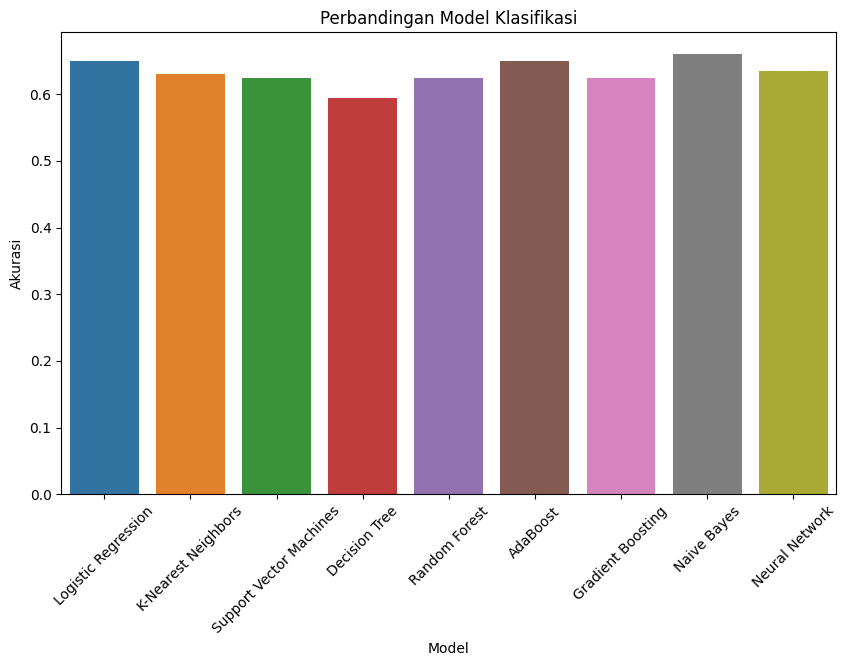

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier())
]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# hyperparameter yang akan diuji
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

# Mencari hyperparameter terbaik dengan cross-validation
logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", logreg_cv.best_params_)
print("Best Accuracy: ", logreg_cv.best_score_)


from sklearn.model_selection import GridSearchCV

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Set hyperparameter yang akan diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Membuat objek GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid=param_grid, cv=5)

# Melatih model dengan GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters: ", grid_search_nb.best_params_)
print("Accuracy: {:.2f}".format(accuracy))



Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.6975
Best Parameters:  {'var_smoothing': 1e-09}
Accuracy: 0.64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(C=10, penalty='l1',solver= 'saga')
logreg.fit(X_train, y_train)
prediksi_logreg = logreg.predict(X_test)
akurasi_logreg = metrics.accuracy_score(y_test, prediksi_logreg)

#NV
naive_bayes = GaussianNB(var_smoothing= 1e-09)
naive_bayes.fit(X_train, y_train)
prediksi_nb = naive_bayes.predict(X_test)
akurasi_nb = metrics.accuracy_score(y_test, prediksi_nb)

print('Akurasi Logistic Regression adalah:', "{:.2%}".format(akurasi_logreg))
print(metrics.classification_report(y_test, prediksi_logreg))

print('Akurasi Naive Bayes adalah:', "{:.2%}".format(akurasi_nb))
print(metrics.classification_report(y_test, prediksi_nb))



Akurasi Logistic Regression adalah: 64.33%
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       183
           1       0.57      0.36      0.44       117

    accuracy                           0.64       300
   macro avg       0.62      0.59      0.59       300
weighted avg       0.63      0.64      0.62       300

Akurasi Naive Bayes adalah: 64.33%
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       183
           1       0.57      0.34      0.43       117

    accuracy                           0.64       300
   macro avg       0.62      0.59      0.58       300
weighted avg       0.63      0.64      0.62       300



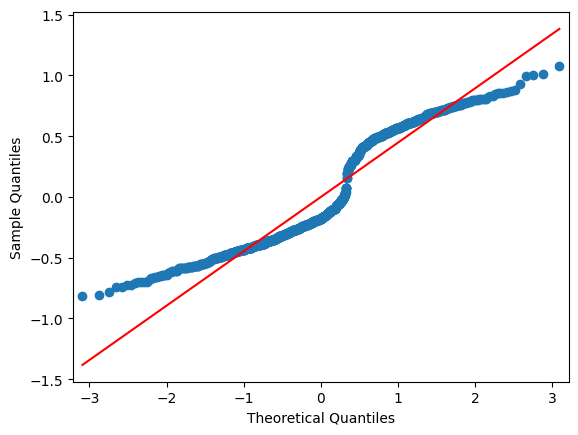


Shapiro-Wilk Test:
Statistic = 0.907, p-value = 0.000
Residual tidak terdistribusi normal (menolak H0)


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

# Shapiro-Wilk test
stat_sw, p_sw = stats.shapiro(residuals)
print('\nShapiro-Wilk Test:')
print(f'Statistic = {stat_sw:.3f}, p-value = {p_sw:.3f}')
if p_sw > 0.05:
    print('Residual terdistribusi normal (tidak dapat menolak H0)')
else:
    print('Residual tidak terdistribusi normal (menolak H0)')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Get VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):\n", vif)


Variance Inflation Factor (VIF):
                       Features        VIF
0                        const  40.327679
1               race/ethnicity   1.012089
2  parental level of education   1.012060
3                        lunch   1.003699
4      test preparation course   1.000751
5                       gender   1.002390


In [ ]:
# Import library yang dibutuhkan
import statsmodels.stats.api as sms

# Uji heteroskedastisitas dengan White Test
white_test = sms.het_white(residuals, X)
print('\nWhite Test:')
print(f'Lagrange Multiplier test statistic: {white_test[0]:.3f}')
print(f'p-value: {white_test[1]:.3f}')
print(f'f-value: {white_test[2]:.3f}')
print(f'f p-value: {white_test[3]:.3f}')

# Interpretasi hasil uji
if white_test[1] > 0.05:
    print('Tidak terdapat bukti heteroskedastisitas (tidak dapat menolak H0)')
else:
    print('Terdapat bukti heteroskedastisitas (menolak H0)')



White Test:
Lagrange Multiplier test statistic: 84.732
p-value: 0.000
f-value: 5.348
f p-value: 0.000
Terdapat bukti heteroskedastisitas (menolak H0)


In [ ]:
from scipy.stats import mannwhitneyu, kruskal

# Mann-Whitney U test
for col in X.columns:
    stat, p = mannwhitneyu(X[col], y)
    print('Mann-Whitney U test for {}: stat = {}, p = {}'.format(col, stat, p))

# Kruskal-Wallis test
for col in X.columns:
    stat, p = kruskal(X[col], y)
    print('Kruskal-Wallis test for {}: stat = {}, p = {}'.format(col, stat, p))


Mann-Whitney U test for const: stat = 815000.0, p = 6.429569456355467e-202
Mann-Whitney U test for race/ethnicity: stat = 983535.0, p = 0.0
Mann-Whitney U test for parental level of education: stat = 966885.0, p = 4.512551089194733e-303
Mann-Whitney U test for lunch: stat = 934325.0, p = 3.8108956336846995e-279
Mann-Whitney U test for test preparation course: stat = 881230.0, p = 2.0489335906002676e-229
Mann-Whitney U test for gender: stat = 904170.0, p = 1.205098385218961e-247
Kruskal-Wallis test for const: stat = 919.2481751824804, p = 6.420184596483498e-202
Kruskal-Wallis test for race/ethnicity: stat = 1477.2533178022431, p = 0.0
Kruskal-Wallis test for parental level of education: stat = 1384.6695676570143, p = 4.5058596580273604e-303
Kruskal-Wallis test for lunch: stat = 1274.5661803570881, p = 3.805303653602952e-279
Kruskal-Wallis test for test preparation course: stat = 1045.746102827536, p = 2.0461226412535735e-229
Kruskal-Wallis test for gender: stat = 1129.6237217355745, p =

In [ ]:
import statsmodels.api as sm

# Define dependent variable (Y) and independent variables (X)
X = sm.add_constant(dfstudent_1[['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','gender']])
y = dfstudent_1['reading_score_binary']


# Backward selection
features = X.columns.tolist()
p_value_threshold = 0.05

while len(features) > 1:
    model = sm.OLS(y, X[features]).fit()
    max_p_value = model.pvalues.drop('const').max()
    if max_p_value >= p_value_threshold:
        features.remove(model.pvalues.idxmax())
    else:
        break

# Print results
print("Backward selection result:")
print("Selected features:", features)


Backward selection result:
Selected features: ['const', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'gender']


In [ ]:
import statsmodels.api as sm

# Define dependent variable (Y) and independent variables (X)
X = dfstudent_1[['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course','gender']]
X['const'] = 1  # add a column named 'const' with all values set to 1
y = dfstudent_1['reading_score_binary']

# Forward selection
features = ['const']
p_value_threshold = 0.05

while len(features) < len(X.columns):
    remaining_features = list(set(X.columns) - set(features))
    p_values = []
    for feature in remaining_features:
        model = sm.OLS(y, X[features+[feature]]).fit()
        p_value = model.pvalues[feature]
        p_values.append(p_value)
    min_p_value = min(p_values)
    if min_p_value < p_value_threshold:
        features.append(remaining_features[p_values.index(min_p_value)])
    else:
        break
# Print results
print("Forward selection result:")
print("Selected features:", features)


Forward selection result:
Selected features: ['const', 'test preparation course', 'gender', 'lunch', 'parental level of education', 'race/ethnicity']


In [ ]:
dfstudent_1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score_cat,reading score_cat,writing score_cat,math_score_binary,reading_score_binary
0,0,1,4,1,0,2.88,2.88,2.96,2,2,2,0,0
1,0,2,2,1,1,2.76,3.60,3.52,2,4,4,0,1
2,0,1,5,1,0,3.60,3.80,3.72,4,4,4,1,1
3,1,0,3,0,0,1.88,2.28,1.76,1,2,1,0,0
4,1,2,2,1,0,3.04,3.12,3.00,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,1,1,3.52,3.96,3.80,4,4,4,1,1
996,1,2,1,0,0,2.48,2.20,2.20,2,2,2,0,0
997,0,2,1,0,1,2.36,2.84,2.60,2,2,2,0,0
998,0,3,2,1,1,2.72,3.12,3.08,2,3,3,0,1


Yang terbaik ialah naive bayes dan logistic regression

## wiritng

In [ ]:
# Buat kolom baru 'math_score_binary'
dfstudent_1['writing_score_binary'] = dfstudent_1['writing score_cat'].apply(lambda x: 0 if x <= 2 else 1)


# Encoding kolom 'math score_cat' menjadi 0 dan 1
le = LabelEncoder()
dfstudent_1['writing_score_binary'] = le.fit_transform(dfstudent_1['writing_score_binary'])

In [ ]:
dfstudent_1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,math score_cat,reading score_cat,writing score_cat,math_score_binary,reading_score_binary,writing_score_binary
916,2,5,5,2,2,4.00,4.00,4.00,100.000000,4,4,4,1,1,1
458,1,5,5,2,1,4.00,4.00,4.00,100.000000,4,4,4,1,1,1
962,1,5,4,2,1,4.00,4.00,4.00,100.000000,4,4,4,1,1,1
114,1,5,5,2,2,3.96,4.00,4.00,99.666667,4,4,4,1,1,1
179,1,4,1,2,2,3.88,4.00,4.00,99.000000,4,4,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2,5,1,2,1,1.20,1.04,0.88,26.000000,1,1,1,0,0,0
327,2,1,3,1,1,1.12,0.92,0.76,23.333333,1,1,1,0,0,0
596,2,2,2,1,1,1.20,0.96,0.60,23.000000,1,1,1,0,0,0
980,1,2,2,1,1,0.32,0.96,0.92,18.333333,1,1,1,0,0,0


In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

# Define dependent variable (Y) and independent variables (X)
X = dfstudent_1[['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'gender']]
y = dfstudent_1['writing_score_binary']

# Add constant term to independent variable
X = sm.add_constant(X)

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.720,0.553571,0.500000,0.525424
1,K-Nearest Neighbors,0.695,0.508475,0.483871,0.495868
2,Support Vector Machines,0.735,0.621622,0.370968,0.464646
3,Decision Tree,0.660,0.446429,0.403226,0.423729
4,Random Forest,0.675,0.476923,0.500000,0.488189
5,AdaBoost,0.680,0.482759,0.451613,0.466667
6,Gradient Boosting,0.700,0.514706,0.564516,0.538462
7,Naive Bayes,0.715,0.545455,0.483871,0.512821
8,Neural Network,0.710,0.533333,0.516129,0.524590


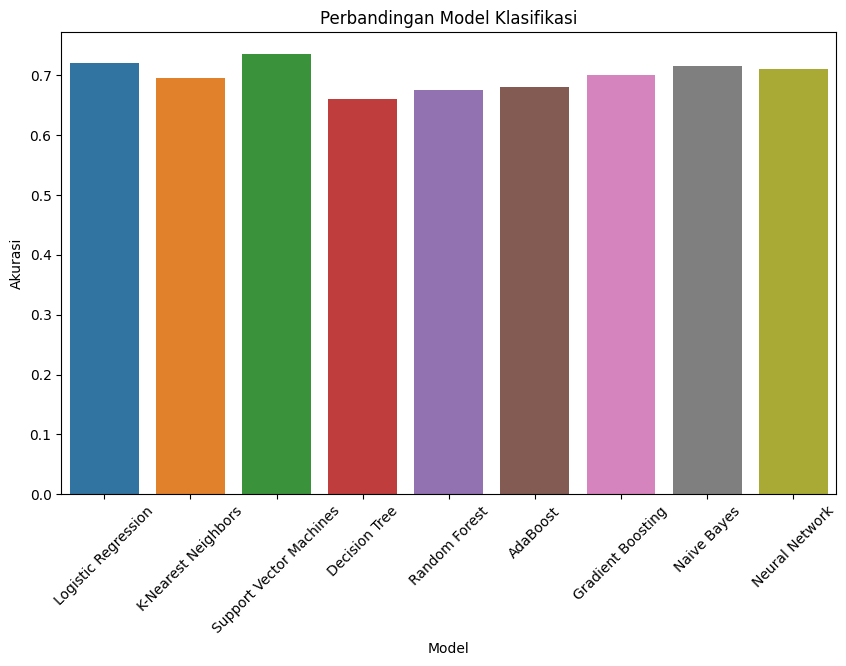

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier())
]

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=45)
plt.ylabel('Akurasi')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# hyperparameter yang akan diuji
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

# Mencari hyperparameter terbaik dengan cross-validation
logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", logreg_cv.best_params_)
print("Best Accuracy: ", logreg_cv.best_score_)


from sklearn.model_selection import GridSearchCV

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Set hyperparameter yang akan diuji
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Membuat objek GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid=param_grid, cv=5)

# Melatih model dengan GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters: ", grid_search_nb.best_params_)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.model_selection import GridSearchCV

svm = SVC()

#hyperparameter yang akan diuji
params = {
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'gamma': ['scale', 'auto']
}

#Mencari hyperparameter terbaik dengan cross-validation
svm_cv = GridSearchCV(svm, params, cv=5)
svm_cv.fit(X_train, y_train)

#Menampilkan hyperparameter terbaik dan akurasi
print("Best Parameters: ", svm_cv.best_params_)
print("Best Accuracy: ", svm_cv.best_score_)

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.7275
Best Parameters:  {'var_smoothing': 1e-09}
Accuracy: 0.71
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy:  0.7225


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(C=10, penalty='l1',solver= 'saga')
logreg.fit(X_train, y_train)
prediksi_logreg = logreg.predict(X_test)
akurasi_logreg = metrics.accuracy_score(y_test, prediksi_logreg)

#NV
naive_bayes = GaussianNB(var_smoothing= 1e-09)
naive_bayes.fit(X_train, y_train)
prediksi_nb = naive_bayes.predict(X_test)
akurasi_nb = metrics.accuracy_score(y_test, prediksi_nb)

print('Akurasi Logistic Regression adalah:', "{:.2%}".format(akurasi_logreg))
print(metrics.classification_report(y_test, prediksi_logreg))

print('Akurasi Naive Bayes adalah:', "{:.2%}".format(akurasi_nb))
print(metrics.classification_report(y_test, prediksi_nb))

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM dengan hyperparameter terbaik
svm = SVC(C=1, gamma='scale', kernel='linear')
svm.fit(X_train, y_train)
prediksi_svm = svm.predict(X_test)
akurasi_svm = metrics.accuracy_score(y_test, prediksi_svm)

print('Akurasi Support Vector Machine adalah:', "{:.2%}".format(akurasi_svm))
print(metrics.classification_report(y_test, prediksi_svm))


Akurasi Logistic Regression adalah: 72.33%
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       201
           1       0.60      0.49      0.54        99

    accuracy                           0.72       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.71      0.72      0.72       300

Akurasi Naive Bayes adalah: 72.67%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       201
           1       0.61      0.48      0.54        99

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.67       300
weighted avg       0.72      0.73      0.72       300

Akurasi Support Vector Machine adalah: 72.33%
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       201
           1       0.61      0.45      0.52        99

    accuracy                           0.72       300
   m

#Conclusion

*   The university rank is determined by the overall score of the students.
*   All features of student performance have an impact on the score.
*   There is no correlation between a student's score and their university's rank.





#Suggestion



*   To achieve a high rank, it is important to obtain a high overall score. This can be achieved by improving
various factors such as academic reputation score, employer reputation score, faculty-student ratio,
citations score, international faculty score, and international student score.
*   While a background check can assist in predicting a student's score, it can only provide an indication of
whether they are likely to achieve a good or bad score. Therefore, conducting a background check
remains necessary to assess the potential performance of the student. Nonetheless, it is important to
note that a background check can only offer a general assessment of their potential performance.

